# Base Paper Implementation

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

## Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)
# df = df.drop(columns = ['Unnamed: 0'])

In [3]:
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [4]:
x = df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [5]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,2020-03-10,1.0,0.0,1
1,2020-03-10,2.0,0.0,2
2,2020-03-10,0.0,0.0,0
3,2020-03-10,0.0,0.0,0
4,2020-03-10,0.0,0.0,0


## Data Preparation For Model Implementation

In [6]:
# dates = np.array(x['Date'])
# dates = [datetime.strptime(date, '%y%y%y%y-%m-%d').date() for date in dates] 
# dates = [x.strftime('%d/%m/%y') for x in dates]
# dates
x['Date'] = pd.to_datetime(x['Date'])
x.sort_values('Date')
x['Date'] = x['Date'].dt.strftime('%d/%m/%y')

In [7]:
x.head(7)

,Date,Confirmed,Deaths,Recovered
0,10/03/20,1.0,0.0,1
1,10/03/20,2.0,0.0,2
2,10/03/20,0.0,0.0,0
3,10/03/20,0.0,0.0,0
4,10/03/20,0.0,0.0,0
5,10/03/20,0.0,0.0,0
6,10/03/20,2.0,0.0,2


In [8]:
dates = list(x['Date'].unique())

In [9]:
x = x.groupby(by=["Date"]).sum()

In [10]:
x.head()

,Confirmed,Deaths,Recovered
Date,,,
01/01/21,482178.0,10176.0,437229
01/01/22,1295933.0,28933.0,1191105
01/02/21,546428.0,11683.0,501252
01/02/22,1430366.0,29301.0,1314639
01/03/21,581365.0,12896.0,546371


## Ploting Imported Data

In [11]:
dates2020 = []
dates2021 = []
dates2022 = []

for date in dates:
    if(date[-2:] == '20'):
        dates2020.append(date)
    elif(date[-2:] == '21'):
        dates2021.append(date)
    elif(date[-2:] == '22'):
        dates2022.append(date)

In [12]:
dates2020.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2021.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2022.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [13]:
confirmed_pk2020 = []
confirmed_pk2021 = []
confirmed_pk2022 = []

deaths_pk2020 = []
deaths_pk2021 = []
deaths_pk2022 = []

recovered_pk2020 = []
recovered_pk2021 = []
recovered_pk2022 = []

for date in dates2020:
    confirmed_pk2020.append(x['Confirmed'][date])
    deaths_pk2020.append(x['Deaths'][date])
    recovered_pk2020.append(x['Recovered'][date])
    
for date in dates2021:
    confirmed_pk2021.append(x['Confirmed'][date])
    deaths_pk2021.append(x['Deaths'][date])
    recovered_pk2021.append(x['Recovered'][date])
    
for date in dates2022:
    confirmed_pk2022.append(x['Confirmed'][date])
    deaths_pk2022.append(x['Deaths'][date])
    recovered_pk2022.append(x['Recovered'][date])

## Year 2020

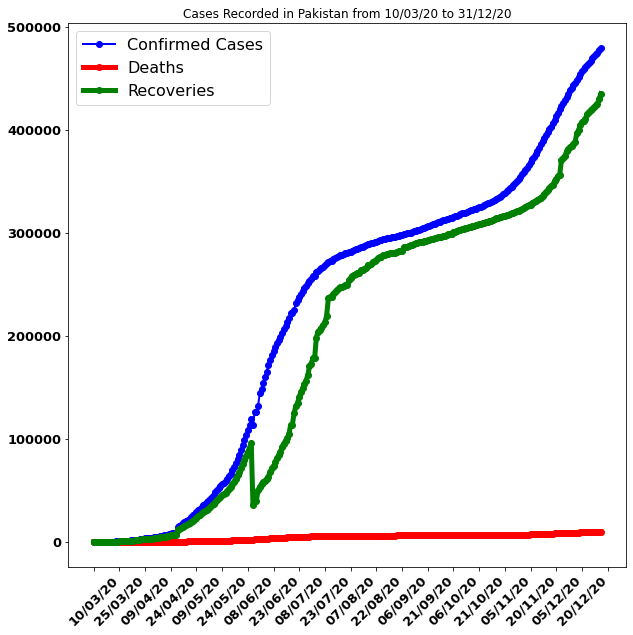

In [14]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2020,confirmed_pk2020, 'bo-', linewidth = 2)
plt.plot(dates2020,deaths_pk2020, 'ro-', linewidth = 5)
plt.plot(dates2020,recovered_pk2020, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2020[0] + ' to ' + dates2020[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Year 2021

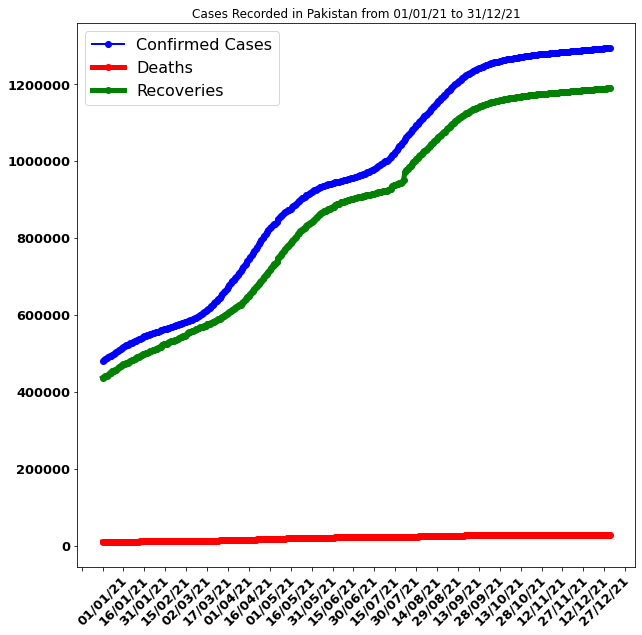

In [15]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2021,confirmed_pk2021, 'bo-', linewidth = 2)
plt.plot(dates2021,deaths_pk2021, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2021,recovered_pk2021, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2021[0] + ' to ' + dates2021[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Year 2022

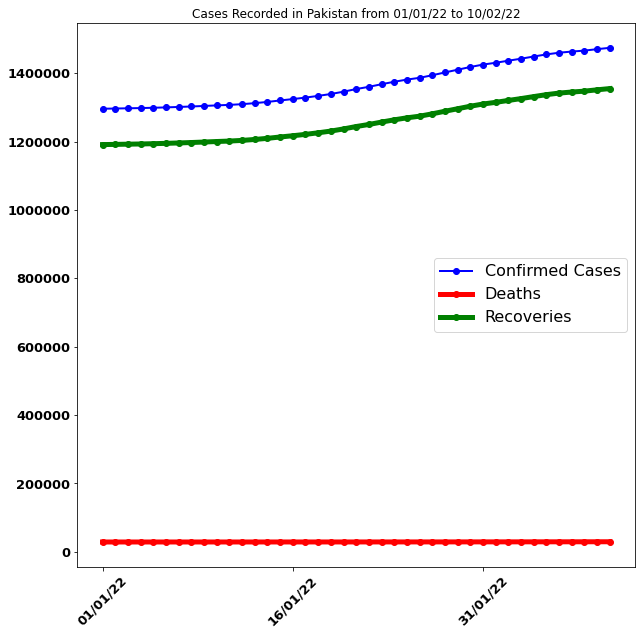

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2022,confirmed_pk2022, 'bo-', linewidth = 2)
plt.plot(dates2022,deaths_pk2022, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2022,recovered_pk2022, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2022[0] + ' to ' + dates2022[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Combined Visualization

In [17]:
dates.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [18]:
confirmed_pk = []
deaths_pk = []
recovered_pk = []

for date in dates:
    confirmed_pk.append(x['Confirmed'][date])
    deaths_pk.append(x['Deaths'][date])
    recovered_pk.append(x['Recovered'][date])

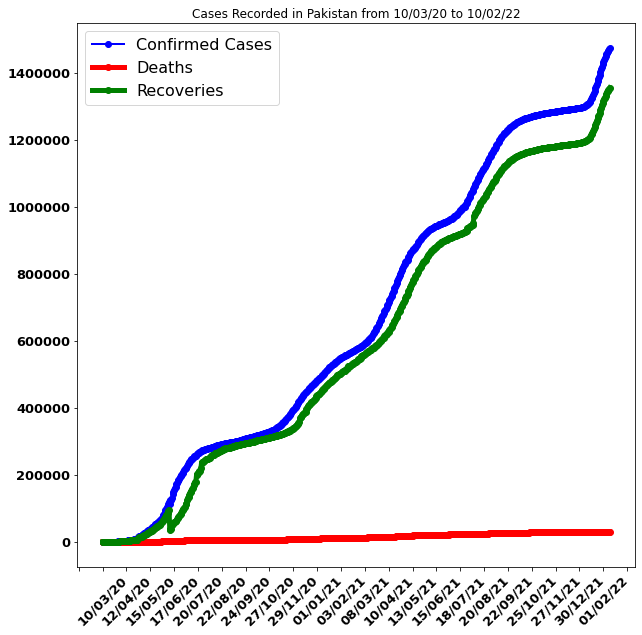

In [19]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=33.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates,confirmed_pk, 'bo-', linewidth = 2)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Data Preprocessing

### Processing input data into polynomial form data

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_reg = PolynomialFeatures(degree = 6)

In [22]:
input_data_simple = np.arange(0,len(x)) + 1

### Data transformed into polynomial equation upto degree mentioned above

In [23]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

### Preparing Input and Dates into DataFrame

In [24]:
inputData_dates = pd.Series(dates, index = input_data_simple)

### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

## Creating Neural Network

<h4>Neural Network Design</h4>
<p>We designed a neural network with <b>one input layer, one hidden layer (with 200 neurons)</b> with <b>rectifying linear activation function</b> and <b>one output layer</b>.</p>

<h4>Optimization/Training</h4>
<p><b>Adam</b> optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. The loss function is used as mean square error between predictions and observations.</p>

In [27]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

## Predictions on All the Cases (Confirmed, Deaths, Recovories) with Designed ANN

<p>This section has been divided into following two subsections:</p>
<ul>
    <li>In first section, the data has splitted into train/test to evaluate the model and named as <b>ann_model_for_evaluation</b>. The purpose of this section is to evaluate the performance and accuracy of model with available data. For this purpose, training data is used to train and fit the model on data and then test data is used to check the efficiency and accuracy of model.</li>
    <li>In second section, once the model has evaluated, whole data is used to train the model and then some future input data is generated to predict the cases in future.</li>
</ul>

## 1 - Evaluating Model on Train Test Splitted Data

#### Splitting data into train-test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
confirmed_pk = np.array(confirmed_pk)
deaths_pk = np.array(deaths_pk)
recovered_pk = np.array(recovered_pk)

In [30]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [31]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

#### Transforming into tensors of input-output data for ANN

In [32]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

#### Creating instance of proposed ANN model

In [33]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

#### A model summary about layers shapes and number of paramaters/weights is given below

In [34]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


#### Selection of best epochs (during experiments) and training/fitting of proposed ANN model on training data

In [35]:
best_epochs = 4000

In [36]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Epoch 1/4000
21/21 [==============================] - 1s 1ms/step - loss: 356015931392.0000 - mean_absolute_error: 404634.5312
Epoch 2/4000
21/21 [==============================] - 0s 1ms/step - loss: 351667912704.0000 - mean_absolute_error: 400672.7500
Epoch 3/4000
21/21 [==============================] - 0s 2ms/step - loss: 340266876928.0000 - mean_absolute_error: 392589.1875
Epoch 4/4000
21/21 [==============================] - 0s 1ms/step - loss: 320920354816.0000 - mean_absolute_error: 380562.8750
Epoch 5/4000
21/21 [==============================] - 0s 1ms/step - loss: 294468157440.0000 - mean_absolute_error: 364191.0000
Epoch 6/4000
21/21 [==============================] - 0s 2ms/step - loss: 262047989760.0000 - mean_absolute_error: 344616.2500
Epoch 7/4000
21/21 [==============================] - 0s 2ms/step - loss: 226716680192.0000 - mean_absolute_error: 321249.9062
Epoch 8/4000
21/21 [==============================] - 0s 2ms/step - loss: 191417335808.0000 - mean_absolute_err

21/21 [==============================] - 0s 2ms/step - loss: 575817408.0000 - mean_absolute_error: 15430.9912
Epoch 67/4000
21/21 [==============================] - 0s 2ms/step - loss: 574537280.0000 - mean_absolute_error: 15621.8936
Epoch 68/4000
21/21 [==============================] - 0s 2ms/step - loss: 574110272.0000 - mean_absolute_error: 15266.9893
Epoch 69/4000
21/21 [==============================] - 0s 2ms/step - loss: 574598656.0000 - mean_absolute_error: 15697.6758
Epoch 70/4000
21/21 [==============================] - 0s 2ms/step - loss: 571840448.0000 - mean_absolute_error: 15212.7920
Epoch 71/4000
21/21 [==============================] - 0s 2ms/step - loss: 569953792.0000 - mean_absolute_error: 15526.6045
Epoch 72/4000
21/21 [==============================] - 0s 2ms/step - loss: 572520000.0000 - mean_absolute_error: 15322.6826
Epoch 73/4000
21/21 [==============================] - 0s 2ms/step - loss: 568157504.0000 - mean_absolute_error: 15387.2266
Epoch 74/4000
21/21 [=

21/21 [==============================] - 0s 928us/step - loss: 545495232.0000 - mean_absolute_error: 14857.4648
Epoch 132/4000
21/21 [==============================] - 0s 1ms/step - loss: 545298304.0000 - mean_absolute_error: 14944.7822
Epoch 133/4000
21/21 [==============================] - 0s 2ms/step - loss: 545116736.0000 - mean_absolute_error: 14906.9268
Epoch 134/4000
21/21 [==============================] - 0s 2ms/step - loss: 544049216.0000 - mean_absolute_error: 14906.6758
Epoch 135/4000
21/21 [==============================] - 0s 2ms/step - loss: 544540160.0000 - mean_absolute_error: 14913.3535
Epoch 136/4000
21/21 [==============================] - 0s 1ms/step - loss: 547590784.0000 - mean_absolute_error: 15065.1826
Epoch 137/4000
21/21 [==============================] - 0s 1ms/step - loss: 543258624.0000 - mean_absolute_error: 14845.1338
Epoch 138/4000
21/21 [==============================] - 0s 2ms/step - loss: 546510592.0000 - mean_absolute_error: 14944.1709
Epoch 139/400

21/21 [==============================] - 0s 2ms/step - loss: 536194240.0000 - mean_absolute_error: 14926.3926
Epoch 197/4000
21/21 [==============================] - 0s 2ms/step - loss: 536349824.0000 - mean_absolute_error: 14919.3018
Epoch 198/4000
21/21 [==============================] - 0s 1ms/step - loss: 536893824.0000 - mean_absolute_error: 14904.7783
Epoch 199/4000
21/21 [==============================] - 0s 2ms/step - loss: 541488064.0000 - mean_absolute_error: 14958.6602
Epoch 200/4000
21/21 [==============================] - 0s 2ms/step - loss: 536409408.0000 - mean_absolute_error: 14973.5713
Epoch 201/4000
21/21 [==============================] - 0s 2ms/step - loss: 536873984.0000 - mean_absolute_error: 14933.9277
Epoch 202/4000
21/21 [==============================] - 0s 2ms/step - loss: 539638144.0000 - mean_absolute_error: 14969.1289
Epoch 203/4000
21/21 [==============================] - 0s 2ms/step - loss: 535347360.0000 - mean_absolute_error: 14870.6582
Epoch 204/4000


21/21 [==============================] - 0s 2ms/step - loss: 528034304.0000 - mean_absolute_error: 14980.4824
Epoch 262/4000
21/21 [==============================] - 0s 2ms/step - loss: 527834176.0000 - mean_absolute_error: 14876.8770
Epoch 263/4000
21/21 [==============================] - 0s 1ms/step - loss: 531135712.0000 - mean_absolute_error: 14850.9893
Epoch 264/4000
21/21 [==============================] - 0s 1ms/step - loss: 532340480.0000 - mean_absolute_error: 15052.2568
Epoch 265/4000
21/21 [==============================] - 0s 950us/step - loss: 525969248.0000 - mean_absolute_error: 14826.0469
Epoch 266/4000
21/21 [==============================] - 0s 1ms/step - loss: 533392992.0000 - mean_absolute_error: 15085.4336
Epoch 267/4000
21/21 [==============================] - 0s 2ms/step - loss: 526908448.0000 - mean_absolute_error: 14891.3789
Epoch 268/4000
21/21 [==============================] - 0s 2ms/step - loss: 526364320.0000 - mean_absolute_error: 14906.4541
Epoch 269/400

21/21 [==============================] - 0s 2ms/step - loss: 504870720.0000 - mean_absolute_error: 14477.0732
Epoch 327/4000
21/21 [==============================] - 0s 2ms/step - loss: 503947232.0000 - mean_absolute_error: 14482.0869
Epoch 328/4000
21/21 [==============================] - 0s 1ms/step - loss: 516469952.0000 - mean_absolute_error: 14725.0146
Epoch 329/4000
21/21 [==============================] - 0s 1ms/step - loss: 506507104.0000 - mean_absolute_error: 14457.2305
Epoch 330/4000
21/21 [==============================] - 0s 2ms/step - loss: 502830560.0000 - mean_absolute_error: 14495.2773
Epoch 331/4000
21/21 [==============================] - 0s 2ms/step - loss: 502269536.0000 - mean_absolute_error: 14455.3477
Epoch 332/4000
21/21 [==============================] - 0s 2ms/step - loss: 503070208.0000 - mean_absolute_error: 14460.8145
Epoch 333/4000
21/21 [==============================] - 0s 2ms/step - loss: 501600128.0000 - mean_absolute_error: 14426.2129
Epoch 334/4000


21/21 [==============================] - 0s 2ms/step - loss: 490989408.0000 - mean_absolute_error: 14300.3945
Epoch 392/4000
21/21 [==============================] - ETA: 0s - loss: 483185664.0000 - mean_absolute_error: 14480.189 - 0s 1ms/step - loss: 490408160.0000 - mean_absolute_error: 14282.8096
Epoch 393/4000
21/21 [==============================] - 0s 1ms/step - loss: 494088416.0000 - mean_absolute_error: 14376.4395
Epoch 394/4000
21/21 [==============================] - 0s 2ms/step - loss: 493583296.0000 - mean_absolute_error: 14342.8848
Epoch 395/4000
21/21 [==============================] - 0s 1ms/step - loss: 487192896.0000 - mean_absolute_error: 14190.1689
Epoch 396/4000
21/21 [==============================] - 0s 1ms/step - loss: 487492448.0000 - mean_absolute_error: 14207.9375
Epoch 397/4000
21/21 [==============================] - 0s 2ms/step - loss: 490630496.0000 - mean_absolute_error: 14292.4346
Epoch 398/4000
21/21 [==============================] - 0s 2ms/step - loss

21/21 [==============================] - 0s 2ms/step - loss: 479158912.0000 - mean_absolute_error: 14153.8008
Epoch 457/4000
21/21 [==============================] - 0s 2ms/step - loss: 481675008.0000 - mean_absolute_error: 14307.1934
Epoch 458/4000
21/21 [==============================] - 0s 2ms/step - loss: 480003008.0000 - mean_absolute_error: 14201.6641
Epoch 459/4000
21/21 [==============================] - 0s 2ms/step - loss: 488886432.0000 - mean_absolute_error: 14465.4570
Epoch 460/4000
21/21 [==============================] - 0s 2ms/step - loss: 478132864.0000 - mean_absolute_error: 14055.1992
Epoch 461/4000
21/21 [==============================] - 0s 1ms/step - loss: 479615840.0000 - mean_absolute_error: 14133.8711
Epoch 462/4000
21/21 [==============================] - 0s 1ms/step - loss: 476550688.0000 - mean_absolute_error: 14133.5186
Epoch 463/4000
21/21 [==============================] - 0s 1ms/step - loss: 479105984.0000 - mean_absolute_error: 14179.5410
Epoch 464/4000


21/21 [==============================] - 0s 2ms/step - loss: 466055872.0000 - mean_absolute_error: 13825.7529
Epoch 522/4000
21/21 [==============================] - 0s 1ms/step - loss: 470744992.0000 - mean_absolute_error: 14039.8994
Epoch 523/4000
21/21 [==============================] - 0s 1ms/step - loss: 469882464.0000 - mean_absolute_error: 13955.8008
Epoch 524/4000
21/21 [==============================] - 0s 1ms/step - loss: 469418656.0000 - mean_absolute_error: 13991.3369
Epoch 525/4000
21/21 [==============================] - 0s 1ms/step - loss: 471799200.0000 - mean_absolute_error: 14102.4277
Epoch 526/4000
21/21 [==============================] - 0s 2ms/step - loss: 470623584.0000 - mean_absolute_error: 13961.4141
Epoch 527/4000
21/21 [==============================] - 0s 2ms/step - loss: 466328640.0000 - mean_absolute_error: 13924.0469
Epoch 528/4000
21/21 [==============================] - 0s 2ms/step - loss: 466012384.0000 - mean_absolute_error: 13948.9375
Epoch 529/4000


21/21 [==============================] - 0s 2ms/step - loss: 459419136.0000 - mean_absolute_error: 13983.1875
Epoch 587/4000
21/21 [==============================] - 0s 2ms/step - loss: 457220352.0000 - mean_absolute_error: 13725.6143
Epoch 588/4000
21/21 [==============================] - 0s 2ms/step - loss: 455235360.0000 - mean_absolute_error: 13864.7334
Epoch 589/4000
21/21 [==============================] - 0s 1ms/step - loss: 455210848.0000 - mean_absolute_error: 13766.7979
Epoch 590/4000
21/21 [==============================] - 0s 1ms/step - loss: 460470720.0000 - mean_absolute_error: 13882.9521
Epoch 591/4000
21/21 [==============================] - 0s 2ms/step - loss: 457664704.0000 - mean_absolute_error: 13926.7920
Epoch 592/4000
21/21 [==============================] - 0s 2ms/step - loss: 457244960.0000 - mean_absolute_error: 13828.3047
Epoch 593/4000
21/21 [==============================] - 0s 2ms/step - loss: 462942656.0000 - mean_absolute_error: 14012.1172
Epoch 594/4000


21/21 [==============================] - 0s 2ms/step - loss: 446368512.0000 - mean_absolute_error: 13711.6758
Epoch 652/4000
21/21 [==============================] - 0s 2ms/step - loss: 449785120.0000 - mean_absolute_error: 13823.4727
Epoch 653/4000
21/21 [==============================] - 0s 1ms/step - loss: 452028320.0000 - mean_absolute_error: 13677.3926
Epoch 654/4000
21/21 [==============================] - 0s 834us/step - loss: 444853984.0000 - mean_absolute_error: 13563.9082
Epoch 655/4000
21/21 [==============================] - 0s 1ms/step - loss: 447173536.0000 - mean_absolute_error: 13618.6787
Epoch 656/4000
21/21 [==============================] - 0s 2ms/step - loss: 445428192.0000 - mean_absolute_error: 13741.8799
Epoch 657/4000
21/21 [==============================] - 0s 1ms/step - loss: 446597344.0000 - mean_absolute_error: 13570.1152
Epoch 658/4000
21/21 [==============================] - 0s 2ms/step - loss: 456118912.0000 - mean_absolute_error: 14078.0312
Epoch 659/400

21/21 [==============================] - 0s 2ms/step - loss: 441341344.0000 - mean_absolute_error: 13620.6270
Epoch 717/4000
21/21 [==============================] - 0s 2ms/step - loss: 435816992.0000 - mean_absolute_error: 13449.7812
Epoch 718/4000
21/21 [==============================] - 0s 2ms/step - loss: 433236256.0000 - mean_absolute_error: 13400.4678
Epoch 719/4000
21/21 [==============================] - 0s 1ms/step - loss: 437456352.0000 - mean_absolute_error: 13572.3633
Epoch 720/4000
21/21 [==============================] - 0s 1ms/step - loss: 439404928.0000 - mean_absolute_error: 13667.1729
Epoch 721/4000
21/21 [==============================] - 0s 984us/step - loss: 437722400.0000 - mean_absolute_error: 13460.6553
Epoch 722/4000
21/21 [==============================] - 0s 1ms/step - loss: 442901472.0000 - mean_absolute_error: 13781.3281
Epoch 723/4000
21/21 [==============================] - 0s 1ms/step - loss: 452224672.0000 - mean_absolute_error: 14094.6309
Epoch 724/400

21/21 [==============================] - 0s 2ms/step - loss: 431724928.0000 - mean_absolute_error: 13488.7314
Epoch 782/4000
21/21 [==============================] - 0s 2ms/step - loss: 427596608.0000 - mean_absolute_error: 13351.8271
Epoch 783/4000
21/21 [==============================] - 0s 1ms/step - loss: 433354048.0000 - mean_absolute_error: 13535.0117
Epoch 784/4000
21/21 [==============================] - 0s 2ms/step - loss: 426057408.0000 - mean_absolute_error: 13344.8486
Epoch 785/4000
21/21 [==============================] - 0s 2ms/step - loss: 427622144.0000 - mean_absolute_error: 13392.0859
Epoch 786/4000
21/21 [==============================] - 0s 1ms/step - loss: 426946112.0000 - mean_absolute_error: 13308.0244
Epoch 787/4000
21/21 [==============================] - 0s 1ms/step - loss: 429715904.0000 - mean_absolute_error: 13345.4170
Epoch 788/4000
21/21 [==============================] - 0s 1ms/step - loss: 429129632.0000 - mean_absolute_error: 13375.8184
Epoch 789/4000


21/21 [==============================] - 0s 1ms/step - loss: 418606720.0000 - mean_absolute_error: 13251.9697
Epoch 847/4000
21/21 [==============================] - 0s 2ms/step - loss: 421022240.0000 - mean_absolute_error: 13306.4238
Epoch 848/4000
21/21 [==============================] - 0s 1ms/step - loss: 422137120.0000 - mean_absolute_error: 13307.3340
Epoch 849/4000
21/21 [==============================] - 0s 1ms/step - loss: 423529632.0000 - mean_absolute_error: 13443.8340
Epoch 850/4000
21/21 [==============================] - 0s 2ms/step - loss: 422301888.0000 - mean_absolute_error: 13320.7402
Epoch 851/4000
21/21 [==============================] - 0s 2ms/step - loss: 416222464.0000 - mean_absolute_error: 13166.5244
Epoch 852/4000
21/21 [==============================] - 0s 2ms/step - loss: 419254048.0000 - mean_absolute_error: 13168.3496
Epoch 853/4000
21/21 [==============================] - 0s 2ms/step - loss: 420837216.0000 - mean_absolute_error: 13321.8730
Epoch 854/4000


21/21 [==============================] - 0s 2ms/step - loss: 417409600.0000 - mean_absolute_error: 13254.4258
Epoch 912/4000
21/21 [==============================] - 0s 1ms/step - loss: 410428160.0000 - mean_absolute_error: 13126.1172
Epoch 913/4000
21/21 [==============================] - 0s 1ms/step - loss: 413101152.0000 - mean_absolute_error: 13146.5273
Epoch 914/4000
21/21 [==============================] - 0s 2ms/step - loss: 411723008.0000 - mean_absolute_error: 13142.5723
Epoch 915/4000
21/21 [==============================] - 0s 1ms/step - loss: 409906304.0000 - mean_absolute_error: 13069.0479
Epoch 916/4000
21/21 [==============================] - 0s 866us/step - loss: 410993120.0000 - mean_absolute_error: 13044.6807
Epoch 917/4000
21/21 [==============================] - 0s 1ms/step - loss: 416594368.0000 - mean_absolute_error: 13296.1621
Epoch 918/4000
21/21 [==============================] - 0s 2ms/step - loss: 409131456.0000 - mean_absolute_error: 13167.6338
Epoch 919/400

21/21 [==============================] - 0s 2ms/step - loss: 402014304.0000 - mean_absolute_error: 12865.7207
Epoch 977/4000
21/21 [==============================] - 0s 2ms/step - loss: 402503136.0000 - mean_absolute_error: 13063.1348
Epoch 978/4000
21/21 [==============================] - 0s 2ms/step - loss: 403614560.0000 - mean_absolute_error: 12976.8955
Epoch 979/4000
21/21 [==============================] - 0s 2ms/step - loss: 403229760.0000 - mean_absolute_error: 12956.7617
Epoch 980/4000
21/21 [==============================] - 0s 2ms/step - loss: 401971040.0000 - mean_absolute_error: 12927.1172
Epoch 981/4000
21/21 [==============================] - 0s 2ms/step - loss: 399805696.0000 - mean_absolute_error: 12904.8848
Epoch 982/4000
21/21 [==============================] - 0s 2ms/step - loss: 401875008.0000 - mean_absolute_error: 12943.8096
Epoch 983/4000
21/21 [==============================] - 0s 1ms/step - loss: 402962528.0000 - mean_absolute_error: 12924.8652
Epoch 984/4000


21/21 [==============================] - 0s 1ms/step - loss: 404618944.0000 - mean_absolute_error: 13096.3926
Epoch 1042/4000
21/21 [==============================] - 0s 2ms/step - loss: 396499264.0000 - mean_absolute_error: 13019.5723
Epoch 1043/4000
21/21 [==============================] - 0s 1ms/step - loss: 396103328.0000 - mean_absolute_error: 12792.9521
Epoch 1044/4000
21/21 [==============================] - 0s 1ms/step - loss: 395971008.0000 - mean_absolute_error: 12880.6758
Epoch 1045/4000
21/21 [==============================] - 0s 2ms/step - loss: 393515200.0000 - mean_absolute_error: 12792.3027
Epoch 1046/4000
21/21 [==============================] - 0s 1ms/step - loss: 398199616.0000 - mean_absolute_error: 12864.5127
Epoch 1047/4000
21/21 [==============================] - 0s 1ms/step - loss: 389694528.0000 - mean_absolute_error: 12728.6055
Epoch 1048/4000
21/21 [==============================] - 0s 2ms/step - loss: 399391136.0000 - mean_absolute_error: 12991.2744
Epoch 10

21/21 [==============================] - 0s 2ms/step - loss: 390429856.0000 - mean_absolute_error: 12683.3633
Epoch 1107/4000
21/21 [==============================] - 0s 2ms/step - loss: 386180448.0000 - mean_absolute_error: 12719.6309
Epoch 1108/4000
21/21 [==============================] - 0s 2ms/step - loss: 386598080.0000 - mean_absolute_error: 12719.5596
Epoch 1109/4000
21/21 [==============================] - 0s 2ms/step - loss: 388832448.0000 - mean_absolute_error: 12820.2607
Epoch 1110/4000
21/21 [==============================] - 0s 2ms/step - loss: 388108096.0000 - mean_absolute_error: 12826.2891
Epoch 1111/4000
21/21 [==============================] - 0s 2ms/step - loss: 394853664.0000 - mean_absolute_error: 12995.4824
Epoch 1112/4000
21/21 [==============================] - 0s 1ms/step - loss: 386979136.0000 - mean_absolute_error: 12815.5273
Epoch 1113/4000
21/21 [==============================] - 0s 1ms/step - loss: 385839232.0000 - mean_absolute_error: 12687.7393
Epoch 11

21/21 [==============================] - 0s 2ms/step - loss: 382704096.0000 - mean_absolute_error: 12656.7725
Epoch 1172/4000
21/21 [==============================] - 0s 2ms/step - loss: 378225568.0000 - mean_absolute_error: 12633.0361
Epoch 1173/4000
21/21 [==============================] - 0s 1ms/step - loss: 386578368.0000 - mean_absolute_error: 12709.7559
Epoch 1174/4000
21/21 [==============================] - 0s 2ms/step - loss: 382954304.0000 - mean_absolute_error: 12779.6855
Epoch 1175/4000
21/21 [==============================] - 0s 1ms/step - loss: 381439552.0000 - mean_absolute_error: 12542.4502
Epoch 1176/4000
21/21 [==============================] - 0s 1ms/step - loss: 379843296.0000 - mean_absolute_error: 12672.7949
Epoch 1177/4000
21/21 [==============================] - 0s 2ms/step - loss: 377526592.0000 - mean_absolute_error: 12567.4697
Epoch 1178/4000
21/21 [==============================] - 0s 2ms/step - loss: 382825952.0000 - mean_absolute_error: 12678.8066
Epoch 11

21/21 [==============================] - 0s 2ms/step - loss: 371398336.0000 - mean_absolute_error: 12475.7695
Epoch 1237/4000
21/21 [==============================] - 0s 2ms/step - loss: 372173984.0000 - mean_absolute_error: 12447.8242
Epoch 1238/4000
21/21 [==============================] - 0s 2ms/step - loss: 370753792.0000 - mean_absolute_error: 12460.9258
Epoch 1239/4000
21/21 [==============================] - 0s 2ms/step - loss: 373662336.0000 - mean_absolute_error: 12378.9385
Epoch 1240/4000
21/21 [==============================] - 0s 2ms/step - loss: 372537408.0000 - mean_absolute_error: 12494.5674
Epoch 1241/4000
21/21 [==============================] - 0s 1ms/step - loss: 374660832.0000 - mean_absolute_error: 12557.7080
Epoch 1242/4000
21/21 [==============================] - 0s 1ms/step - loss: 380898976.0000 - mean_absolute_error: 12718.4678
Epoch 1243/4000
21/21 [==============================] - 0s 2ms/step - loss: 376404640.0000 - mean_absolute_error: 12660.7061
Epoch 12

21/21 [==============================] - 0s 2ms/step - loss: 364594304.0000 - mean_absolute_error: 12321.5342
Epoch 1302/4000
21/21 [==============================] - 0s 1ms/step - loss: 364397312.0000 - mean_absolute_error: 12298.3193
Epoch 1303/4000
21/21 [==============================] - 0s 1ms/step - loss: 364975360.0000 - mean_absolute_error: 12358.4639
Epoch 1304/4000
21/21 [==============================] - 0s 2ms/step - loss: 368152192.0000 - mean_absolute_error: 12442.1084
Epoch 1305/4000
21/21 [==============================] - 0s 2ms/step - loss: 365580576.0000 - mean_absolute_error: 12259.9092
Epoch 1306/4000
21/21 [==============================] - 0s 2ms/step - loss: 375849856.0000 - mean_absolute_error: 12496.6953
Epoch 1307/4000
21/21 [==============================] - 0s 1ms/step - loss: 373377600.0000 - mean_absolute_error: 12656.3086
Epoch 1308/4000
21/21 [==============================] - 0s 1ms/step - loss: 366846752.0000 - mean_absolute_error: 12394.8105
Epoch 13

21/21 [==============================] - 0s 2ms/step - loss: 357311520.0000 - mean_absolute_error: 12127.4248
Epoch 1367/4000
21/21 [==============================] - 0s 1ms/step - loss: 357054656.0000 - mean_absolute_error: 12261.5020
Epoch 1368/4000
21/21 [==============================] - 0s 1ms/step - loss: 356265376.0000 - mean_absolute_error: 12194.9521
Epoch 1369/4000
21/21 [==============================] - 0s 2ms/step - loss: 360250464.0000 - mean_absolute_error: 12236.8281
Epoch 1370/4000
21/21 [==============================] - 0s 1ms/step - loss: 367571808.0000 - mean_absolute_error: 12522.3682
Epoch 1371/4000
21/21 [==============================] - 0s 1ms/step - loss: 365660832.0000 - mean_absolute_error: 12409.0791
Epoch 1372/4000
21/21 [==============================] - 0s 2ms/step - loss: 358265824.0000 - mean_absolute_error: 12242.3691
Epoch 1373/4000
21/21 [==============================] - 0s 2ms/step - loss: 355234880.0000 - mean_absolute_error: 12175.2822
Epoch 13

21/21 [==============================] - 0s 2ms/step - loss: 352865792.0000 - mean_absolute_error: 12049.8477
Epoch 1431/4000
21/21 [==============================] - 0s 2ms/step - loss: 351299232.0000 - mean_absolute_error: 12151.2119
Epoch 1432/4000
21/21 [==============================] - 0s 1ms/step - loss: 355232800.0000 - mean_absolute_error: 12105.0215
Epoch 1433/4000
21/21 [==============================] - 0s 2ms/step - loss: 349012896.0000 - mean_absolute_error: 12076.7666
Epoch 1434/4000
21/21 [==============================] - 0s 1ms/step - loss: 349998720.0000 - mean_absolute_error: 12170.0391
Epoch 1435/4000
21/21 [==============================] - 0s 2ms/step - loss: 350710048.0000 - mean_absolute_error: 12105.6436
Epoch 1436/4000
21/21 [==============================] - 0s 2ms/step - loss: 351433472.0000 - mean_absolute_error: 12064.3643
Epoch 1437/4000
21/21 [==============================] - 0s 2ms/step - loss: 350602624.0000 - mean_absolute_error: 12078.6758
Epoch 14

21/21 [==============================] - 0s 2ms/step - loss: 343544672.0000 - mean_absolute_error: 11926.4980
Epoch 1496/4000
21/21 [==============================] - 0s 2ms/step - loss: 342772736.0000 - mean_absolute_error: 11895.7061
Epoch 1497/4000
21/21 [==============================] - 0s 2ms/step - loss: 341862240.0000 - mean_absolute_error: 11923.7881
Epoch 1498/4000
21/21 [==============================] - 0s 1ms/step - loss: 344492992.0000 - mean_absolute_error: 11984.7002
Epoch 1499/4000
21/21 [==============================] - 0s 2ms/step - loss: 341374976.0000 - mean_absolute_error: 11897.3984
Epoch 1500/4000
21/21 [==============================] - 0s 2ms/step - loss: 346250208.0000 - mean_absolute_error: 12063.9717
Epoch 1501/4000
21/21 [==============================] - 0s 2ms/step - loss: 340501024.0000 - mean_absolute_error: 11842.5596
Epoch 1502/4000
21/21 [==============================] - 0s 2ms/step - loss: 344409504.0000 - mean_absolute_error: 11928.7412
Epoch 15

21/21 [==============================] - 0s 1ms/step - loss: 335257472.0000 - mean_absolute_error: 11784.3691
Epoch 1561/4000
21/21 [==============================] - 0s 1ms/step - loss: 336043616.0000 - mean_absolute_error: 11826.0645
Epoch 1562/4000
21/21 [==============================] - 0s 1ms/step - loss: 334081216.0000 - mean_absolute_error: 11754.5684
Epoch 1563/4000
21/21 [==============================] - 0s 1ms/step - loss: 339194112.0000 - mean_absolute_error: 11905.5830
Epoch 1564/4000
21/21 [==============================] - 0s 1ms/step - loss: 334646112.0000 - mean_absolute_error: 11694.2471
Epoch 1565/4000
21/21 [==============================] - 0s 2ms/step - loss: 337872640.0000 - mean_absolute_error: 11860.6729
Epoch 1566/4000
21/21 [==============================] - 0s 2ms/step - loss: 336404480.0000 - mean_absolute_error: 11937.3535
Epoch 1567/4000
21/21 [==============================] - 0s 1ms/step - loss: 333428160.0000 - mean_absolute_error: 11692.3662
Epoch 15

21/21 [==============================] - 0s 2ms/step - loss: 328981568.0000 - mean_absolute_error: 11637.0723
Epoch 1626/4000
21/21 [==============================] - 0s 2ms/step - loss: 329580928.0000 - mean_absolute_error: 11674.2598
Epoch 1627/4000
21/21 [==============================] - 0s 1ms/step - loss: 332430816.0000 - mean_absolute_error: 11748.0361
Epoch 1628/4000
21/21 [==============================] - 0s 1ms/step - loss: 342538240.0000 - mean_absolute_error: 12098.9541
Epoch 1629/4000
21/21 [==============================] - 0s 1ms/step - loss: 337693408.0000 - mean_absolute_error: 11905.0400
Epoch 1630/4000
21/21 [==============================] - 0s 2ms/step - loss: 337018624.0000 - mean_absolute_error: 11957.2861
Epoch 1631/4000
21/21 [==============================] - 0s 2ms/step - loss: 337093024.0000 - mean_absolute_error: 12009.9395
Epoch 1632/4000
21/21 [==============================] - 0s 2ms/step - loss: 330369152.0000 - mean_absolute_error: 11514.4004
Epoch 16

21/21 [==============================] - 0s 1ms/step - loss: 323710656.0000 - mean_absolute_error: 11607.3330
Epoch 1691/4000
21/21 [==============================] - 0s 2ms/step - loss: 328801120.0000 - mean_absolute_error: 11736.9717
Epoch 1692/4000
21/21 [==============================] - 0s 2ms/step - loss: 324568384.0000 - mean_absolute_error: 11587.3301
Epoch 1693/4000
21/21 [==============================] - 0s 2ms/step - loss: 322066592.0000 - mean_absolute_error: 11481.4990
Epoch 1694/4000
21/21 [==============================] - 0s 2ms/step - loss: 320696320.0000 - mean_absolute_error: 11504.5635
Epoch 1695/4000
21/21 [==============================] - 0s 2ms/step - loss: 320467296.0000 - mean_absolute_error: 11404.5596
Epoch 1696/4000
21/21 [==============================] - 0s 1ms/step - loss: 322999648.0000 - mean_absolute_error: 11512.5010
Epoch 1697/4000
21/21 [==============================] - 0s 2ms/step - loss: 321431552.0000 - mean_absolute_error: 11528.6201
Epoch 16

21/21 [==============================] - 0s 1ms/step - loss: 313702144.0000 - mean_absolute_error: 11313.2002
Epoch 1755/4000
21/21 [==============================] - 0s 1ms/step - loss: 323272640.0000 - mean_absolute_error: 11462.2822
Epoch 1756/4000
21/21 [==============================] - 0s 1ms/step - loss: 317355456.0000 - mean_absolute_error: 11490.7363
Epoch 1757/4000
21/21 [==============================] - 0s 1ms/step - loss: 315206592.0000 - mean_absolute_error: 11297.2861
Epoch 1758/4000
21/21 [==============================] - 0s 1ms/step - loss: 317248512.0000 - mean_absolute_error: 11415.1543
Epoch 1759/4000
21/21 [==============================] - 0s 1ms/step - loss: 317280928.0000 - mean_absolute_error: 11342.0078
Epoch 1760/4000
21/21 [==============================] - 0s 2ms/step - loss: 315501408.0000 - mean_absolute_error: 11451.3311
Epoch 1761/4000
21/21 [==============================] - 0s 2ms/step - loss: 325425472.0000 - mean_absolute_error: 11572.2295
Epoch 17

21/21 [==============================] - 0s 2ms/step - loss: 308611968.0000 - mean_absolute_error: 11230.5010
Epoch 1819/4000
21/21 [==============================] - 0s 2ms/step - loss: 308806432.0000 - mean_absolute_error: 11177.0371
Epoch 1820/4000
21/21 [==============================] - 0s 1ms/step - loss: 311701216.0000 - mean_absolute_error: 11291.4893
Epoch 1821/4000
21/21 [==============================] - 0s 2ms/step - loss: 310117024.0000 - mean_absolute_error: 11244.9756
Epoch 1822/4000
21/21 [==============================] - 0s 2ms/step - loss: 309366880.0000 - mean_absolute_error: 11219.1182
Epoch 1823/4000
21/21 [==============================] - 0s 1ms/step - loss: 309774560.0000 - mean_absolute_error: 11223.4229
Epoch 1824/4000
21/21 [==============================] - 0s 2ms/step - loss: 311215424.0000 - mean_absolute_error: 11310.9834
Epoch 1825/4000
21/21 [==============================] - 0s 1ms/step - loss: 312037824.0000 - mean_absolute_error: 11321.0732
Epoch 18

21/21 [==============================] - 0s 1ms/step - loss: 301287744.0000 - mean_absolute_error: 11032.0498
Epoch 1884/4000
21/21 [==============================] - 0s 1ms/step - loss: 302421280.0000 - mean_absolute_error: 11099.2754
Epoch 1885/4000
21/21 [==============================] - 0s 1ms/step - loss: 302968672.0000 - mean_absolute_error: 10988.2217
Epoch 1886/4000
21/21 [==============================] - 0s 2ms/step - loss: 308567584.0000 - mean_absolute_error: 11213.2080
Epoch 1887/4000
21/21 [==============================] - 0s 2ms/step - loss: 308016544.0000 - mean_absolute_error: 11280.9541
Epoch 1888/4000
21/21 [==============================] - 0s 1ms/step - loss: 312881536.0000 - mean_absolute_error: 11325.9111
Epoch 1889/4000
21/21 [==============================] - 0s 2ms/step - loss: 304931040.0000 - mean_absolute_error: 11221.2803
Epoch 1890/4000
21/21 [==============================] - 0s 2ms/step - loss: 302413504.0000 - mean_absolute_error: 11010.1963
Epoch 18

21/21 [==============================] - 0s 2ms/step - loss: 293196672.0000 - mean_absolute_error: 10880.6562
Epoch 1949/4000
21/21 [==============================] - 0s 2ms/step - loss: 295253952.0000 - mean_absolute_error: 10870.4834
Epoch 1950/4000
21/21 [==============================] - 0s 2ms/step - loss: 293986176.0000 - mean_absolute_error: 10967.5068
Epoch 1951/4000
21/21 [==============================] - 0s 2ms/step - loss: 294953664.0000 - mean_absolute_error: 10944.5166
Epoch 1952/4000
21/21 [==============================] - 0s 2ms/step - loss: 300178784.0000 - mean_absolute_error: 11003.1104
Epoch 1953/4000
21/21 [==============================] - 0s 2ms/step - loss: 300806656.0000 - mean_absolute_error: 11196.1270
Epoch 1954/4000
21/21 [==============================] - 0s 2ms/step - loss: 295626176.0000 - mean_absolute_error: 10938.5205
Epoch 1955/4000
21/21 [==============================] - 0s 2ms/step - loss: 294424224.0000 - mean_absolute_error: 10951.5820
Epoch 19

21/21 [==============================] - 0s 2ms/step - loss: 282430752.0000 - mean_absolute_error: 10750.5850
Epoch 2014/4000
21/21 [==============================] - 0s 1ms/step - loss: 281837536.0000 - mean_absolute_error: 10620.7285
Epoch 2015/4000
21/21 [==============================] - 0s 2ms/step - loss: 282402720.0000 - mean_absolute_error: 10690.0938
Epoch 2016/4000
21/21 [==============================] - 0s 2ms/step - loss: 280068192.0000 - mean_absolute_error: 10637.8428
Epoch 2017/4000
21/21 [==============================] - 0s 2ms/step - loss: 281588960.0000 - mean_absolute_error: 10610.6719
Epoch 2018/4000
21/21 [==============================] - 0s 2ms/step - loss: 281910816.0000 - mean_absolute_error: 10634.6973
Epoch 2019/4000
21/21 [==============================] - 0s 1ms/step - loss: 283990240.0000 - mean_absolute_error: 10756.7363
Epoch 2020/4000
21/21 [==============================] - 0s 2ms/step - loss: 279565152.0000 - mean_absolute_error: 10593.6279
Epoch 20

21/21 [==============================] - 0s 2ms/step - loss: 268531296.0000 - mean_absolute_error: 10453.5566
Epoch 2079/4000
21/21 [==============================] - 0s 2ms/step - loss: 263167280.0000 - mean_absolute_error: 10250.9854
Epoch 2080/4000
21/21 [==============================] - 0s 2ms/step - loss: 263539040.0000 - mean_absolute_error: 10337.9893
Epoch 2081/4000
21/21 [==============================] - 0s 2ms/step - loss: 262896144.0000 - mean_absolute_error: 10302.3887
Epoch 2082/4000
21/21 [==============================] - 0s 2ms/step - loss: 264132096.0000 - mean_absolute_error: 10262.7256
Epoch 2083/4000
21/21 [==============================] - 0s 2ms/step - loss: 282356576.0000 - mean_absolute_error: 10840.3213
Epoch 2084/4000
21/21 [==============================] - 0s 2ms/step - loss: 269854400.0000 - mean_absolute_error: 10412.4102
Epoch 2085/4000
21/21 [==============================] - 0s 2ms/step - loss: 265205552.0000 - mean_absolute_error: 10323.4385
Epoch 20

21/21 [==============================] - 0s 2ms/step - loss: 245530624.0000 - mean_absolute_error: 9943.2686
Epoch 2143/4000
21/21 [==============================] - 0s 2ms/step - loss: 250075328.0000 - mean_absolute_error: 10095.2070
Epoch 2144/4000
21/21 [==============================] - 0s 1ms/step - loss: 249865808.0000 - mean_absolute_error: 10136.3398
Epoch 2145/4000
21/21 [==============================] - 0s 1ms/step - loss: 246484720.0000 - mean_absolute_error: 10029.0146
Epoch 2146/4000
21/21 [==============================] - 0s 2ms/step - loss: 245009280.0000 - mean_absolute_error: 9980.9727
Epoch 2147/4000
21/21 [==============================] - 0s 2ms/step - loss: 245629744.0000 - mean_absolute_error: 9977.0879
Epoch 2148/4000
21/21 [==============================] - 0s 2ms/step - loss: 244975072.0000 - mean_absolute_error: 10000.5820
Epoch 2149/4000
21/21 [==============================] - 0s 1ms/step - loss: 244086112.0000 - mean_absolute_error: 9981.6133
Epoch 2150/4

21/21 [==============================] - 0s 2ms/step - loss: 228046976.0000 - mean_absolute_error: 9644.2080
Epoch 2208/4000
21/21 [==============================] - 0s 2ms/step - loss: 228065088.0000 - mean_absolute_error: 9582.0928
Epoch 2209/4000
21/21 [==============================] - 0s 2ms/step - loss: 229512960.0000 - mean_absolute_error: 9660.8496
Epoch 2210/4000
21/21 [==============================] - 0s 2ms/step - loss: 228358848.0000 - mean_absolute_error: 9636.0762
Epoch 2211/4000
21/21 [==============================] - 0s 1ms/step - loss: 227638784.0000 - mean_absolute_error: 9633.5166
Epoch 2212/4000
21/21 [==============================] - 0s 781us/step - loss: 226144096.0000 - mean_absolute_error: 9607.8320
Epoch 2213/4000
21/21 [==============================] - 0s 894us/step - loss: 227821952.0000 - mean_absolute_error: 9592.4971
Epoch 2214/4000
21/21 [==============================] - 0s 1ms/step - loss: 227022128.0000 - mean_absolute_error: 9586.5576
Epoch 2215/4

21/21 [==============================] - 0s 2ms/step - loss: 217703936.0000 - mean_absolute_error: 9327.0176
Epoch 2273/4000
21/21 [==============================] - 0s 4ms/step - loss: 215300736.0000 - mean_absolute_error: 9277.8467
Epoch 2274/4000
21/21 [==============================] - 0s 2ms/step - loss: 211974736.0000 - mean_absolute_error: 9192.9766
Epoch 2275/4000
21/21 [==============================] - 0s 2ms/step - loss: 215612112.0000 - mean_absolute_error: 9328.6973
Epoch 2276/4000
21/21 [==============================] - 0s 2ms/step - loss: 214139712.0000 - mean_absolute_error: 9223.1523
Epoch 2277/4000
21/21 [==============================] - 0s 1ms/step - loss: 211351664.0000 - mean_absolute_error: 9163.7480
Epoch 2278/4000
21/21 [==============================] - 0s 2ms/step - loss: 211837088.0000 - mean_absolute_error: 9164.7822
Epoch 2279/4000
21/21 [==============================] - 0s 2ms/step - loss: 216018128.0000 - mean_absolute_error: 9328.5449
Epoch 2280/4000


21/21 [==============================] - 0s 2ms/step - loss: 213199344.0000 - mean_absolute_error: 9225.8994
Epoch 2338/4000
21/21 [==============================] - 0s 1ms/step - loss: 203726064.0000 - mean_absolute_error: 8980.6221
Epoch 2339/4000
21/21 [==============================] - 0s 1ms/step - loss: 201713376.0000 - mean_absolute_error: 8892.9941
Epoch 2340/4000
21/21 [==============================] - 0s 2ms/step - loss: 207425200.0000 - mean_absolute_error: 9137.3340
Epoch 2341/4000
21/21 [==============================] - 0s 2ms/step - loss: 202535024.0000 - mean_absolute_error: 8873.5820
Epoch 2342/4000
21/21 [==============================] - 0s 2ms/step - loss: 205635632.0000 - mean_absolute_error: 8981.7852
Epoch 2343/4000
21/21 [==============================] - 0s 2ms/step - loss: 205468880.0000 - mean_absolute_error: 8945.2812
Epoch 2344/4000
21/21 [==============================] - 0s 2ms/step - loss: 199763952.0000 - mean_absolute_error: 8876.7256
Epoch 2345/4000


21/21 [==============================] - 0s 2ms/step - loss: 197263392.0000 - mean_absolute_error: 8719.1807
Epoch 2403/4000
21/21 [==============================] - 0s 1ms/step - loss: 197002480.0000 - mean_absolute_error: 8765.4277
Epoch 2404/4000
21/21 [==============================] - 0s 2ms/step - loss: 203876368.0000 - mean_absolute_error: 9013.3223
Epoch 2405/4000
21/21 [==============================] - 0s 1ms/step - loss: 197299648.0000 - mean_absolute_error: 8793.9404
Epoch 2406/4000
21/21 [==============================] - 0s 2ms/step - loss: 196144592.0000 - mean_absolute_error: 8747.9072
Epoch 2407/4000
21/21 [==============================] - 0s 2ms/step - loss: 201589760.0000 - mean_absolute_error: 8956.6699
Epoch 2408/4000
21/21 [==============================] - 0s 2ms/step - loss: 194176688.0000 - mean_absolute_error: 8681.3037
Epoch 2409/4000
21/21 [==============================] - 0s 1ms/step - loss: 194472640.0000 - mean_absolute_error: 8698.5137
Epoch 2410/4000


21/21 [==============================] - 0s 2ms/step - loss: 190568960.0000 - mean_absolute_error: 8624.0195
Epoch 2468/4000
21/21 [==============================] - 0s 2ms/step - loss: 186420080.0000 - mean_absolute_error: 8447.2686
Epoch 2469/4000
21/21 [==============================] - 0s 2ms/step - loss: 191698656.0000 - mean_absolute_error: 8613.2539
Epoch 2470/4000
21/21 [==============================] - 0s 2ms/step - loss: 195195296.0000 - mean_absolute_error: 8733.6133
Epoch 2471/4000
21/21 [==============================] - 0s 1ms/step - loss: 188955536.0000 - mean_absolute_error: 8657.7500
Epoch 2472/4000
21/21 [==============================] - 0s 1ms/step - loss: 189326784.0000 - mean_absolute_error: 8590.7666
Epoch 2473/4000
21/21 [==============================] - 0s 2ms/step - loss: 188412480.0000 - mean_absolute_error: 8516.7754
Epoch 2474/4000
21/21 [==============================] - 0s 2ms/step - loss: 186288896.0000 - mean_absolute_error: 8511.5576
Epoch 2475/4000


21/21 [==============================] - 0s 957us/step - loss: 183639808.0000 - mean_absolute_error: 8369.8516
Epoch 2533/4000
21/21 [==============================] - 0s 1ms/step - loss: 183932048.0000 - mean_absolute_error: 8471.9736
Epoch 2534/4000
21/21 [==============================] - 0s 2ms/step - loss: 183838912.0000 - mean_absolute_error: 8490.9590
Epoch 2535/4000
21/21 [==============================] - 0s 2ms/step - loss: 190384704.0000 - mean_absolute_error: 8523.4775
Epoch 2536/4000
21/21 [==============================] - 0s 2ms/step - loss: 185211008.0000 - mean_absolute_error: 8476.6885
Epoch 2537/4000
21/21 [==============================] - 0s 1ms/step - loss: 182833024.0000 - mean_absolute_error: 8413.3828
Epoch 2538/4000
21/21 [==============================] - 0s 2ms/step - loss: 184078928.0000 - mean_absolute_error: 8427.7754
Epoch 2539/4000
21/21 [==============================] - 0s 2ms/step - loss: 179561616.0000 - mean_absolute_error: 8285.4854
Epoch 2540/400

21/21 [==============================] - 0s 1ms/step - loss: 175661264.0000 - mean_absolute_error: 8194.4824
Epoch 2598/4000
21/21 [==============================] - 0s 1ms/step - loss: 175252480.0000 - mean_absolute_error: 8151.5039
Epoch 2599/4000
21/21 [==============================] - 0s 2ms/step - loss: 181855600.0000 - mean_absolute_error: 8407.0371
Epoch 2600/4000
21/21 [==============================] - 0s 2ms/step - loss: 186555904.0000 - mean_absolute_error: 8501.9336
Epoch 2601/4000
21/21 [==============================] - 0s 2ms/step - loss: 177142656.0000 - mean_absolute_error: 8260.6104
Epoch 2602/4000
21/21 [==============================] - 0s 2ms/step - loss: 174774336.0000 - mean_absolute_error: 8172.8008
Epoch 2603/4000
21/21 [==============================] - 0s 1ms/step - loss: 174597424.0000 - mean_absolute_error: 8143.3687
Epoch 2604/4000
21/21 [==============================] - 0s 2ms/step - loss: 174235872.0000 - mean_absolute_error: 8165.8936
Epoch 2605/4000


21/21 [==============================] - 0s 2ms/step - loss: 172520224.0000 - mean_absolute_error: 8129.2031
Epoch 2663/4000
21/21 [==============================] - 0s 2ms/step - loss: 174806160.0000 - mean_absolute_error: 8165.0269
Epoch 2664/4000
21/21 [==============================] - 0s 2ms/step - loss: 175536000.0000 - mean_absolute_error: 8217.9209
Epoch 2665/4000
21/21 [==============================] - 0s 2ms/step - loss: 168623216.0000 - mean_absolute_error: 7986.8833
Epoch 2666/4000
21/21 [==============================] - ETA: 0s - loss: 159415840.0000 - mean_absolute_error: 7787.94 - 0s 1ms/step - loss: 168697360.0000 - mean_absolute_error: 7973.9136
Epoch 2667/4000
21/21 [==============================] - 0s 2ms/step - loss: 173440912.0000 - mean_absolute_error: 8189.4609
Epoch 2668/4000
21/21 [==============================] - 0s 2ms/step - loss: 172449680.0000 - mean_absolute_error: 8069.3281
Epoch 2669/4000
21/21 [==============================] - 0s 2ms/step - loss: 

21/21 [==============================] - 0s 2ms/step - loss: 165619152.0000 - mean_absolute_error: 7928.8652
Epoch 2727/4000
21/21 [==============================] - 0s 2ms/step - loss: 164541360.0000 - mean_absolute_error: 7817.9717
Epoch 2728/4000
21/21 [==============================] - 0s 2ms/step - loss: 166656192.0000 - mean_absolute_error: 7923.4814
Epoch 2729/4000
21/21 [==============================] - 0s 2ms/step - loss: 171149024.0000 - mean_absolute_error: 8039.6333
Epoch 2730/4000
21/21 [==============================] - ETA: 0s - loss: 166125280.0000 - mean_absolute_error: 7999.68 - 0s 4ms/step - loss: 163844272.0000 - mean_absolute_error: 7883.4155
Epoch 2731/4000
21/21 [==============================] - 0s 2ms/step - loss: 167999184.0000 - mean_absolute_error: 8021.4717
Epoch 2732/4000
21/21 [==============================] - 0s 2ms/step - loss: 169408416.0000 - mean_absolute_error: 8038.2832
Epoch 2733/4000
21/21 [==============================] - 0s 2ms/step - loss: 

21/21 [==============================] - 0s 2ms/step - loss: 160202112.0000 - mean_absolute_error: 7754.0142
Epoch 2791/4000
21/21 [==============================] - 0s 2ms/step - loss: 162385696.0000 - mean_absolute_error: 7842.1484
Epoch 2792/4000
21/21 [==============================] - 0s 2ms/step - loss: 159920784.0000 - mean_absolute_error: 7737.1187
Epoch 2793/4000
21/21 [==============================] - 0s 2ms/step - loss: 161411600.0000 - mean_absolute_error: 7765.5444
Epoch 2794/4000
21/21 [==============================] - 0s 2ms/step - loss: 162885792.0000 - mean_absolute_error: 7816.5122
Epoch 2795/4000
21/21 [==============================] - 0s 2ms/step - loss: 168198800.0000 - mean_absolute_error: 8036.3701
Epoch 2796/4000
21/21 [==============================] - 0s 1ms/step - loss: 162366528.0000 - mean_absolute_error: 7904.2856
Epoch 2797/4000
21/21 [==============================] - 0s 2ms/step - loss: 160306384.0000 - mean_absolute_error: 7759.2817
Epoch 2798/4000


21/21 [==============================] - 0s 2ms/step - loss: 156101920.0000 - mean_absolute_error: 7667.7896
Epoch 2856/4000
21/21 [==============================] - 0s 2ms/step - loss: 156887952.0000 - mean_absolute_error: 7689.2017
Epoch 2857/4000
21/21 [==============================] - 0s 1ms/step - loss: 156644448.0000 - mean_absolute_error: 7698.4185
Epoch 2858/4000
21/21 [==============================] - 0s 1ms/step - loss: 157485392.0000 - mean_absolute_error: 7750.5225
Epoch 2859/4000
21/21 [==============================] - 0s 1ms/step - loss: 158141136.0000 - mean_absolute_error: 7689.0684
Epoch 2860/4000
21/21 [==============================] - 0s 2ms/step - loss: 157159056.0000 - mean_absolute_error: 7688.5391
Epoch 2861/4000
21/21 [==============================] - 0s 2ms/step - loss: 155393088.0000 - mean_absolute_error: 7684.5659
Epoch 2862/4000
21/21 [==============================] - 0s 2ms/step - loss: 155433936.0000 - mean_absolute_error: 7637.3599
Epoch 2863/4000


21/21 [==============================] - 0s 1ms/step - loss: 157101232.0000 - mean_absolute_error: 7769.6133
Epoch 2921/4000
21/21 [==============================] - 0s 2ms/step - loss: 152129680.0000 - mean_absolute_error: 7489.8394
Epoch 2922/4000
21/21 [==============================] - 0s 2ms/step - loss: 153488512.0000 - mean_absolute_error: 7559.9370
Epoch 2923/4000
21/21 [==============================] - 0s 2ms/step - loss: 149095136.0000 - mean_absolute_error: 7468.0278
Epoch 2924/4000
21/21 [==============================] - 0s 2ms/step - loss: 148624048.0000 - mean_absolute_error: 7487.7759
Epoch 2925/4000
21/21 [==============================] - 0s 2ms/step - loss: 153536000.0000 - mean_absolute_error: 7595.7314
Epoch 2926/4000
21/21 [==============================] - 0s 2ms/step - loss: 154174736.0000 - mean_absolute_error: 7660.2671
Epoch 2927/4000
21/21 [==============================] - 0s 2ms/step - loss: 154779104.0000 - mean_absolute_error: 7726.0840
Epoch 2928/4000


21/21 [==============================] - 0s 1ms/step - loss: 145527280.0000 - mean_absolute_error: 7408.6709
Epoch 2986/4000
21/21 [==============================] - 0s 1ms/step - loss: 144349488.0000 - mean_absolute_error: 7301.8853
Epoch 2987/4000
21/21 [==============================] - 0s 1ms/step - loss: 144478864.0000 - mean_absolute_error: 7289.6396
Epoch 2988/4000
21/21 [==============================] - 0s 2ms/step - loss: 149115424.0000 - mean_absolute_error: 7539.1909
Epoch 2989/4000
21/21 [==============================] - 0s 1ms/step - loss: 145345456.0000 - mean_absolute_error: 7313.0508
Epoch 2990/4000
21/21 [==============================] - 0s 2ms/step - loss: 142786960.0000 - mean_absolute_error: 7300.9326
Epoch 2991/4000
21/21 [==============================] - 0s 1ms/step - loss: 146202128.0000 - mean_absolute_error: 7439.0586
Epoch 2992/4000
21/21 [==============================] - 0s 2ms/step - loss: 144409056.0000 - mean_absolute_error: 7369.1328
Epoch 2993/4000


21/21 [==============================] - 0s 1ms/step - loss: 143434080.0000 - mean_absolute_error: 7324.1035
Epoch 3050/4000
21/21 [==============================] - 0s 2ms/step - loss: 138461808.0000 - mean_absolute_error: 7149.9932
Epoch 3051/4000
21/21 [==============================] - 0s 1ms/step - loss: 138076736.0000 - mean_absolute_error: 7135.3906
Epoch 3052/4000
21/21 [==============================] - 0s 2ms/step - loss: 139227920.0000 - mean_absolute_error: 7212.1875
Epoch 3053/4000
21/21 [==============================] - 0s 1ms/step - loss: 140679824.0000 - mean_absolute_error: 7245.3726
Epoch 3054/4000
21/21 [==============================] - 0s 1ms/step - loss: 143062720.0000 - mean_absolute_error: 7356.6206
Epoch 3055/4000
21/21 [==============================] - 0s 1ms/step - loss: 140417280.0000 - mean_absolute_error: 7215.3457
Epoch 3056/4000
21/21 [==============================] - 0s 2ms/step - loss: 142971360.0000 - mean_absolute_error: 7316.4844
Epoch 3057/4000


21/21 [==============================] - 0s 1ms/step - loss: 134018272.0000 - mean_absolute_error: 7060.2871
Epoch 3115/4000
21/21 [==============================] - 0s 1ms/step - loss: 137264128.0000 - mean_absolute_error: 7231.6177
Epoch 3116/4000
21/21 [==============================] - 0s 1ms/step - loss: 133524712.0000 - mean_absolute_error: 7026.3896
Epoch 3117/4000
21/21 [==============================] - 0s 2ms/step - loss: 133960680.0000 - mean_absolute_error: 7027.7690
Epoch 3118/4000
21/21 [==============================] - 0s 2ms/step - loss: 132176776.0000 - mean_absolute_error: 6940.3911
Epoch 3119/4000
21/21 [==============================] - 0s 2ms/step - loss: 132882024.0000 - mean_absolute_error: 6994.7832
Epoch 3120/4000
21/21 [==============================] - 0s 2ms/step - loss: 130645624.0000 - mean_absolute_error: 6942.7939
Epoch 3121/4000
21/21 [==============================] - 0s 3ms/step - loss: 132519536.0000 - mean_absolute_error: 6961.7310
Epoch 3122/4000


21/21 [==============================] - 0s 2ms/step - loss: 125259488.0000 - mean_absolute_error: 6734.4331
Epoch 3180/4000
21/21 [==============================] - 0s 2ms/step - loss: 131561024.0000 - mean_absolute_error: 6990.7427
Epoch 3181/4000
21/21 [==============================] - 0s 2ms/step - loss: 130550424.0000 - mean_absolute_error: 7009.8555
Epoch 3182/4000
21/21 [==============================] - 0s 2ms/step - loss: 125519336.0000 - mean_absolute_error: 6782.1733
Epoch 3183/4000
21/21 [==============================] - 0s 2ms/step - loss: 123985008.0000 - mean_absolute_error: 6671.6147
Epoch 3184/4000
21/21 [==============================] - 0s 1ms/step - loss: 125304904.0000 - mean_absolute_error: 6756.0605
Epoch 3185/4000
21/21 [==============================] - 0s 1ms/step - loss: 126463352.0000 - mean_absolute_error: 6810.3315
Epoch 3186/4000
21/21 [==============================] - 0s 1ms/step - loss: 124877856.0000 - mean_absolute_error: 6764.7788
Epoch 3187/4000


21/21 [==============================] - 0s 2ms/step - loss: 117039816.0000 - mean_absolute_error: 6527.6221
Epoch 3245/4000
21/21 [==============================] - 0s 2ms/step - loss: 116448448.0000 - mean_absolute_error: 6471.4023
Epoch 3246/4000
21/21 [==============================] - 0s 2ms/step - loss: 116079624.0000 - mean_absolute_error: 6452.5054
Epoch 3247/4000
21/21 [==============================] - 0s 2ms/step - loss: 116817576.0000 - mean_absolute_error: 6514.6260
Epoch 3248/4000
21/21 [==============================] - 0s 2ms/step - loss: 122905672.0000 - mean_absolute_error: 6815.8867
Epoch 3249/4000
21/21 [==============================] - 0s 2ms/step - loss: 118239056.0000 - mean_absolute_error: 6613.0645
Epoch 3250/4000
21/21 [==============================] - 0s 2ms/step - loss: 115575488.0000 - mean_absolute_error: 6451.3374
Epoch 3251/4000
21/21 [==============================] - 0s 2ms/step - loss: 116818752.0000 - mean_absolute_error: 6465.6987
Epoch 3252/4000


21/21 [==============================] - 0s 2ms/step - loss: 108561240.0000 - mean_absolute_error: 6255.5273
Epoch 3310/4000
21/21 [==============================] - 0s 1ms/step - loss: 109173240.0000 - mean_absolute_error: 6211.0967
Epoch 3311/4000
21/21 [==============================] - 0s 1ms/step - loss: 110624720.0000 - mean_absolute_error: 6236.8989
Epoch 3312/4000
21/21 [==============================] - 0s 1ms/step - loss: 110743512.0000 - mean_absolute_error: 6344.0059
Epoch 3313/4000
21/21 [==============================] - 0s 1ms/step - loss: 111487872.0000 - mean_absolute_error: 6345.6411
Epoch 3314/4000
21/21 [==============================] - 0s 2ms/step - loss: 109538632.0000 - mean_absolute_error: 6316.7632
Epoch 3315/4000
21/21 [==============================] - 0s 2ms/step - loss: 109001808.0000 - mean_absolute_error: 6281.2280
Epoch 3316/4000
21/21 [==============================] - 0s 2ms/step - loss: 111504576.0000 - mean_absolute_error: 6340.6709
Epoch 3317/4000


21/21 [==============================] - 0s 1ms/step - loss: 100830256.0000 - mean_absolute_error: 6000.3442
Epoch 3375/4000
21/21 [==============================] - 0s 1ms/step - loss: 103808592.0000 - mean_absolute_error: 6067.5845
Epoch 3376/4000
21/21 [==============================] - 0s 2ms/step - loss: 102111664.0000 - mean_absolute_error: 6055.2329
Epoch 3377/4000
21/21 [==============================] - 0s 2ms/step - loss: 102719600.0000 - mean_absolute_error: 6064.7446
Epoch 3378/4000
21/21 [==============================] - 0s 2ms/step - loss: 104187280.0000 - mean_absolute_error: 6113.0864
Epoch 3379/4000
21/21 [==============================] - 0s 2ms/step - loss: 100592616.0000 - mean_absolute_error: 5950.7007
Epoch 3380/4000
21/21 [==============================] - 0s 2ms/step - loss: 101948136.0000 - mean_absolute_error: 6003.8232
Epoch 3381/4000
21/21 [==============================] - 0s 1ms/step - loss: 103018272.0000 - mean_absolute_error: 6082.6519
Epoch 3382/4000


Epoch 3440/4000
21/21 [==============================] - 0s 2ms/step - loss: 95141632.0000 - mean_absolute_error: 5877.3784
Epoch 3441/4000
21/21 [==============================] - 0s 989us/step - loss: 93971320.0000 - mean_absolute_error: 5776.6367
Epoch 3442/4000
21/21 [==============================] - 0s 1ms/step - loss: 91719488.0000 - mean_absolute_error: 5645.7837
Epoch 3443/4000
21/21 [==============================] - 0s 1ms/step - loss: 92766400.0000 - mean_absolute_error: 5717.3281
Epoch 3444/4000
21/21 [==============================] - 0s 7ms/step - loss: 96937184.0000 - mean_absolute_error: 5896.3154A: 0s - loss: 90258176.0000 - mean_absolute_error: 5502.95
Epoch 3445/4000
21/21 [==============================] - 0s 5ms/step - loss: 93271952.0000 - mean_absolute_error: 5747.2358
Epoch 3446/4000
21/21 [==============================] - 0s 4ms/step - loss: 96165184.0000 - mean_absolute_error: 5876.1875
Epoch 3447/4000
21/21 [==============================] - 0s 4ms/step - l

21/21 [==============================] - 0s 2ms/step - loss: 86386104.0000 - mean_absolute_error: 5539.3135
Epoch 3506/4000
21/21 [==============================] - 0s 4ms/step - loss: 85075712.0000 - mean_absolute_error: 5446.6494
Epoch 3507/4000
21/21 [==============================] - 0s 2ms/step - loss: 86753320.0000 - mean_absolute_error: 5530.7158
Epoch 3508/4000
21/21 [==============================] - 0s 2ms/step - loss: 85479312.0000 - mean_absolute_error: 5460.5430
Epoch 3509/4000
21/21 [==============================] - 0s 2ms/step - loss: 87358488.0000 - mean_absolute_error: 5629.3022
Epoch 3510/4000
21/21 [==============================] - 0s 1ms/step - loss: 86126520.0000 - mean_absolute_error: 5464.3062
Epoch 3511/4000
21/21 [==============================] - 0s 1ms/step - loss: 86692184.0000 - mean_absolute_error: 5546.7227
Epoch 3512/4000
21/21 [==============================] - 0s 2ms/step - loss: 87286368.0000 - mean_absolute_error: 5537.4375
Epoch 3513/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 81558056.0000 - mean_absolute_error: 5417.5312
Epoch 3572/4000
21/21 [==============================] - 0s 2ms/step - loss: 79667728.0000 - mean_absolute_error: 5249.8184
Epoch 3573/4000
21/21 [==============================] - 0s 1ms/step - loss: 81452056.0000 - mean_absolute_error: 5396.4067
Epoch 3574/4000
21/21 [==============================] - 0s 1ms/step - loss: 79640512.0000 - mean_absolute_error: 5327.9263
Epoch 3575/4000
21/21 [==============================] - 0s 2ms/step - loss: 79508152.0000 - mean_absolute_error: 5219.2085
Epoch 3576/4000
21/21 [==============================] - 0s 1ms/step - loss: 82267848.0000 - mean_absolute_error: 5429.1411
Epoch 3577/4000
21/21 [==============================] - 0s 2ms/step - loss: 80387712.0000 - mean_absolute_error: 5341.4692
Epoch 3578/4000
21/21 [==============================] - 0s 2ms/step - loss: 80027424.0000 - mean_absolute_error: 5380.5454
Epoch 3579/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 73133696.0000 - mean_absolute_error: 5105.5815
Epoch 3638/4000
21/21 [==============================] - 0s 2ms/step - loss: 73030640.0000 - mean_absolute_error: 5055.3848
Epoch 3639/4000
21/21 [==============================] - 0s 2ms/step - loss: 73428216.0000 - mean_absolute_error: 5098.8213
Epoch 3640/4000
21/21 [==============================] - 0s 1ms/step - loss: 74135344.0000 - mean_absolute_error: 5100.1235
Epoch 3641/4000
21/21 [==============================] - 0s 2ms/step - loss: 73717336.0000 - mean_absolute_error: 5043.4702
Epoch 3642/4000
21/21 [==============================] - 0s 856us/step - loss: 80145600.0000 - mean_absolute_error: 5437.2158
Epoch 3643/4000
21/21 [==============================] - 0s 1ms/step - loss: 80998304.0000 - mean_absolute_error: 5488.6128
Epoch 3644/4000
21/21 [==============================] - 0s 1ms/step - loss: 81393584.0000 - mean_absolute_error: 5446.4736
Epoch 3645/4000
21/21 

21/21 [==============================] - 0s 3ms/step - loss: 69355624.0000 - mean_absolute_error: 4935.5493
Epoch 3704/4000
21/21 [==============================] - 0s 2ms/step - loss: 66325320.0000 - mean_absolute_error: 4765.2163
Epoch 3705/4000
21/21 [==============================] - 0s 2ms/step - loss: 68168168.0000 - mean_absolute_error: 4905.9175
Epoch 3706/4000
21/21 [==============================] - 0s 1ms/step - loss: 68011200.0000 - mean_absolute_error: 4919.0811
Epoch 3707/4000
21/21 [==============================] - 0s 1ms/step - loss: 67919840.0000 - mean_absolute_error: 4879.9331
Epoch 3708/4000
21/21 [==============================] - 0s 745us/step - loss: 68121400.0000 - mean_absolute_error: 4909.8784
Epoch 3709/4000
21/21 [==============================] - ETA: 0s - loss: 70859184.0000 - mean_absolute_error: 4799.862 - 0s 1ms/step - loss: 69885544.0000 - mean_absolute_error: 4987.2285
Epoch 3710/4000
21/21 [==============================] - 0s 2ms/step - loss: 67695

21/21 [==============================] - 0s 2ms/step - loss: 64115304.0000 - mean_absolute_error: 4806.0244
Epoch 3769/4000
21/21 [==============================] - 0s 2ms/step - loss: 61850532.0000 - mean_absolute_error: 4634.8018
Epoch 3770/4000
21/21 [==============================] - 0s 2ms/step - loss: 62500760.0000 - mean_absolute_error: 4671.7646
Epoch 3771/4000
21/21 [==============================] - 0s 3ms/step - loss: 62620820.0000 - mean_absolute_error: 4672.5317
Epoch 3772/4000
21/21 [==============================] - 0s 2ms/step - loss: 62119636.0000 - mean_absolute_error: 4675.4922
Epoch 3773/4000
21/21 [==============================] - 0s 1ms/step - loss: 64246084.0000 - mean_absolute_error: 4804.8052
Epoch 3774/4000
21/21 [==============================] - 0s 1ms/step - loss: 63457700.0000 - mean_absolute_error: 4708.7559
Epoch 3775/4000
21/21 [==============================] - 0s 955us/step - loss: 61370612.0000 - mean_absolute_error: 4619.4829
Epoch 3776/4000
21/21 

21/21 [==============================] - 0s 2ms/step - loss: 55878296.0000 - mean_absolute_error: 4400.0176
Epoch 3834/4000
21/21 [==============================] - 0s 2ms/step - loss: 54832336.0000 - mean_absolute_error: 4323.8071
Epoch 3835/4000
21/21 [==============================] - 0s 967us/step - loss: 55651008.0000 - mean_absolute_error: 4380.0347
Epoch 3836/4000
21/21 [==============================] - 0s 822us/step - loss: 59154320.0000 - mean_absolute_error: 4587.7075
Epoch 3837/4000
21/21 [==============================] - 0s 1ms/step - loss: 55129048.0000 - mean_absolute_error: 4365.2607
Epoch 3838/4000
21/21 [==============================] - 0s 1ms/step - loss: 53919848.0000 - mean_absolute_error: 4266.9746
Epoch 3839/4000
21/21 [==============================] - 0s 2ms/step - loss: 53785068.0000 - mean_absolute_error: 4259.6611
Epoch 3840/4000
21/21 [==============================] - 0s 2ms/step - loss: 53947748.0000 - mean_absolute_error: 4262.0229
Epoch 3841/4000
21/2

21/21 [==============================] - 0s 2ms/step - loss: 52295912.0000 - mean_absolute_error: 4327.3550
Epoch 3900/4000
21/21 [==============================] - 0s 2ms/step - loss: 50835896.0000 - mean_absolute_error: 4203.6870
Epoch 3901/4000
21/21 [==============================] - 0s 1ms/step - loss: 51159720.0000 - mean_absolute_error: 4238.1797
Epoch 3902/4000
21/21 [==============================] - 0s 2ms/step - loss: 49645836.0000 - mean_absolute_error: 4061.3306
Epoch 3903/4000
21/21 [==============================] - 0s 2ms/step - loss: 48947084.0000 - mean_absolute_error: 4073.7185
Epoch 3904/4000
21/21 [==============================] - 0s 2ms/step - loss: 50727604.0000 - mean_absolute_error: 4190.3574
Epoch 3905/4000
21/21 [==============================] - 0s 2ms/step - loss: 51011728.0000 - mean_absolute_error: 4133.1221
Epoch 3906/4000
21/21 [==============================] - 0s 1ms/step - loss: 50643768.0000 - mean_absolute_error: 4140.1855
Epoch 3907/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 48034352.0000 - mean_absolute_error: 4154.3848
Epoch 3966/4000
21/21 [==============================] - 0s 2ms/step - loss: 45095144.0000 - mean_absolute_error: 3891.7173
Epoch 3967/4000
21/21 [==============================] - 0s 2ms/step - loss: 44662908.0000 - mean_absolute_error: 3826.2100
Epoch 3968/4000
21/21 [==============================] - 0s 2ms/step - loss: 51183136.0000 - mean_absolute_error: 4281.0591
Epoch 3969/4000
21/21 [==============================] - 0s 2ms/step - loss: 46856052.0000 - mean_absolute_error: 4053.2810
Epoch 3970/4000
21/21 [==============================] - 0s 2ms/step - loss: 44224664.0000 - mean_absolute_error: 3847.6116
Epoch 3971/4000
21/21 [==============================] - 0s 2ms/step - loss: 43915084.0000 - mean_absolute_error: 3791.3696
Epoch 3972/4000
21/21 [==============================] - 0s 2ms/step - loss: 44015452.0000 - mean_absolute_error: 3803.7156
Epoch 3973/4000
21/21 [=

#### Covergence rate is plotted for neural network loss function during optimization

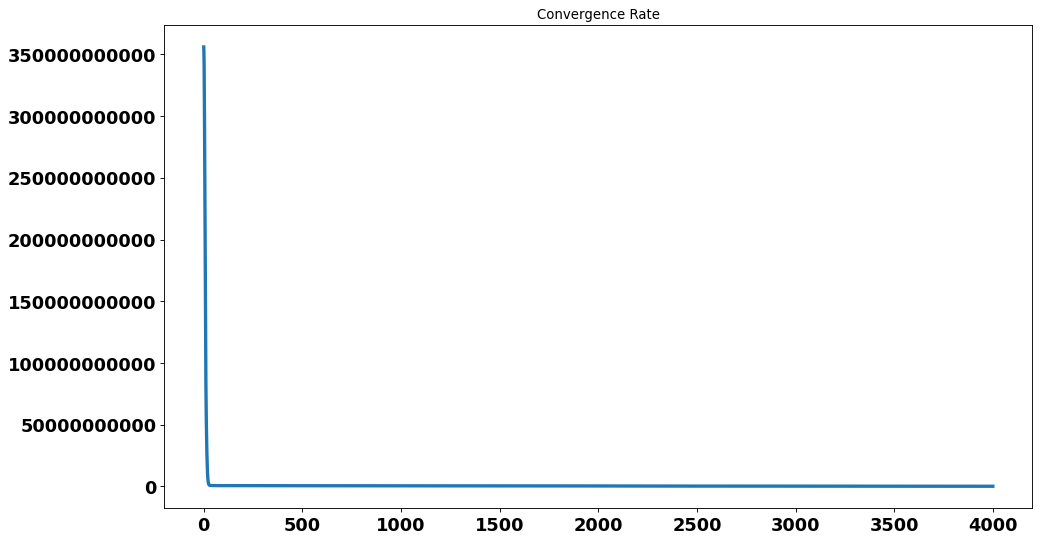

In [37]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
plt.title('Convergence Rate')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [38]:
min(fitting_amfe.history['loss'])

42616676.0

#### Training parameters (weights and biases) values of trained ANN

In [39]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[ 179.42036     86.47899     93.18614   ...   84.60083     84.12458
    97.068985 ]
 [-104.43765     66.38768     68.84082   ...   69.5215      69.091576
    70.67168  ]
 [ -75.51001     33.87118     33.973618  ...   37.58314     37.04939
    34.56623  ]
 [ -55.193436     4.19764      4.6486974 ...    5.4927692    5.4015465
     4.735477 ]
 [ -62.531517   -20.910856   -18.71721   ...  -23.242107   -23.312704
   -18.187796 ]
 [ -80.67422    -44.827003   -39.993073  ...  -51.540203   -51.207336
   -38.463024 ]]

 Hidden Layer 1 biases: 
 [-57.27269   -24.658417  -15.2507105 -19.266941    7.049509   -1.1046618
   8.122382  -10.731653   13.23686   -33.41824    47.124847  -21.9305
 -17.13649     5.8139625 -23.109257    8.782184   77.7882      9.525654
 -11.69656     4.348194  -31.43129     8.546423    9.126204  -34.724613
  15.45065     9.807466   47.452377   46.6575      9.749542   -9.965809
  11.311087   48.937595   60.686993  -33.362995   11.250243   95.64924
  54

#### Evaluating model on train and test sets

In [40]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

#### An evaluation report of ANN and metrics

In [41]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

21/21 [==============================] - 0s 1ms/step - loss: 41748728.0000 - mean_absolute_error: 3752.8972
[41748728.0, 3752.897216796875]
2/2 [==============================] - 0s 0s/step - loss: 4416483840.0000 - mean_absolute_error: 46137.2344
[4416483840.0, 46137.234375]


<h4>Plots between Predictions and Acutal Data for Training and Test Set</h4>
<p>The graphs has been plotted for training and test sets where grpahs in first column are showing predictions and 2nd column is represeting error between predicted and actual value.
    <br>
First row graphs is plotted for training data. 2nd row graph is plotted for test data.
    <br>
Remember: Training and test data were splitted by taking 0.05 ratio for test data with no randomization.</p>

In [42]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(1427,)

In [43]:
# # plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=13)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates_train, 
#          ann_evaluation_model_prediction_on_training[:,0], '*b', 
#          ann_evaluation_model_prediction_on_training[:,1], '*r', 
#          ann_evaluation_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.show()

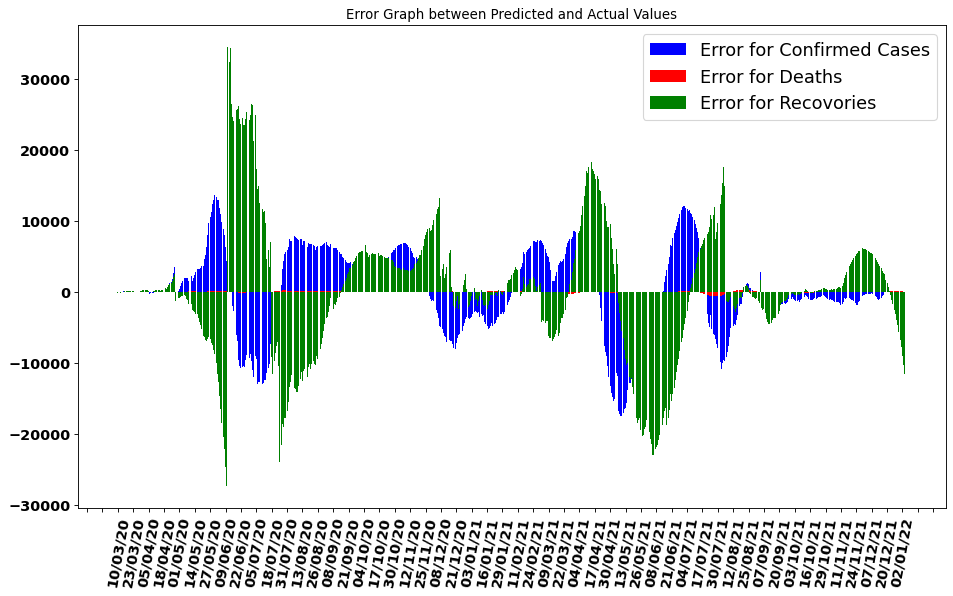

In [44]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

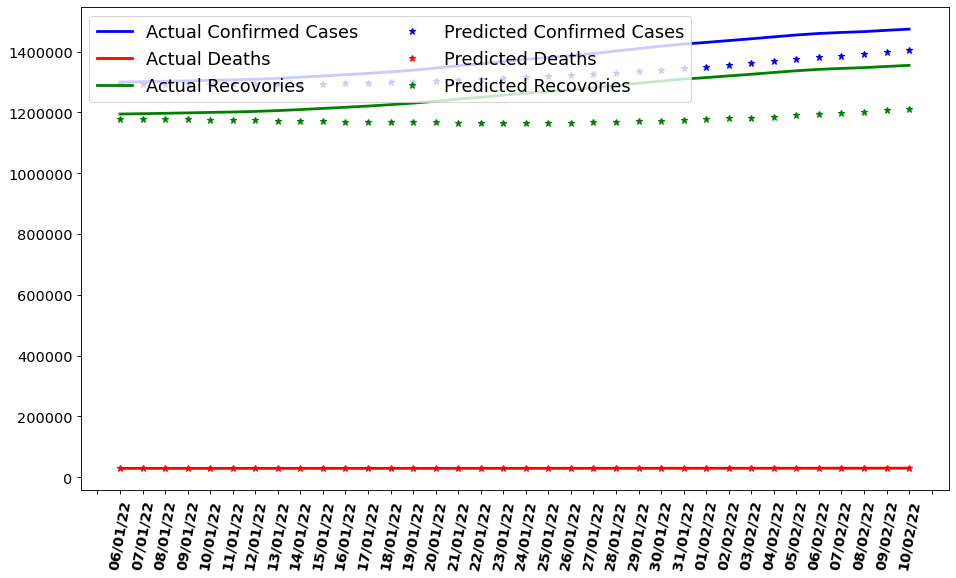

In [45]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()

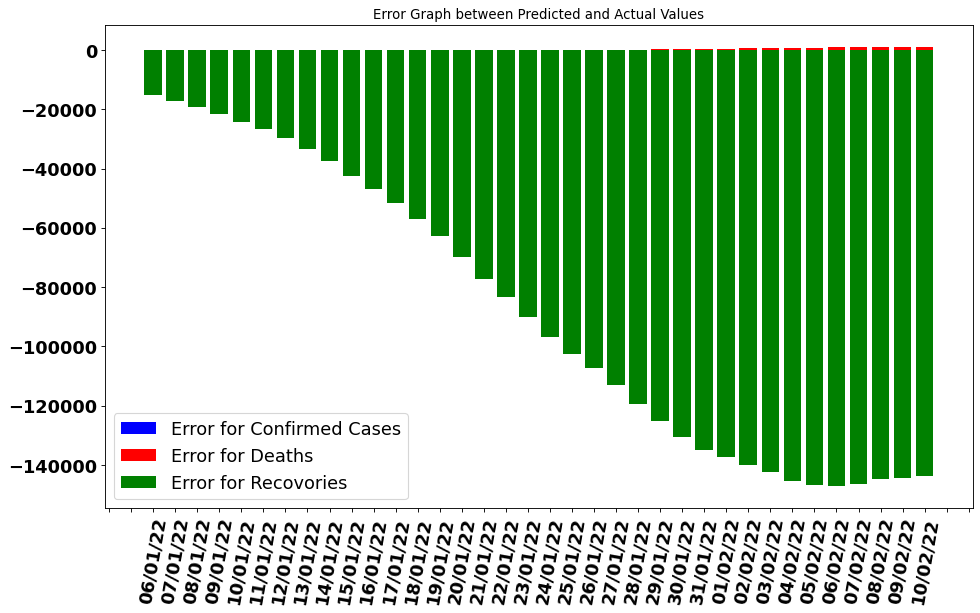

In [46]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

# 2 - Training on whole data and prediction on future data

In [47]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [48]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Epoch 1/4000
22/22 [==============================] - 1s 2ms/step - loss: 397421051904.0000 - mean_absolute_error: 429391.2188
Epoch 2/4000
22/22 [==============================] - 0s 2ms/step - loss: 391382106112.0000 - mean_absolute_error: 424444.5000
Epoch 3/4000
22/22 [==============================] - 0s 2ms/step - loss: 376202133504.0000 - mean_absolute_error: 414660.6562
Epoch 4/4000
22/22 [==============================] - 0s 1ms/step - loss: 350662328320.0000 - mean_absolute_error: 399836.7188
Epoch 5/4000
22/22 [==============================] - 0s 2ms/step - loss: 315541782528.0000 - mean_absolute_error: 379354.7500
Epoch 6/4000
22/22 [==============================] - 0s 2ms/step - loss: 274265833472.0000 - mean_absolute_error: 354656.1250
Epoch 7/4000
22/22 [==============================] - 0s 2ms/step - loss: 231922057216.0000 - mean_absolute_error: 326982.8125
Epoch 8/4000
22/22 [==============================] - 0s 2ms/step - loss: 188708077568.0000 - mean_absolute_err

22/22 [==============================] - 0s 1ms/step - loss: 534866144.0000 - mean_absolute_error: 14455.3682
Epoch 67/4000
22/22 [==============================] - 0s 945us/step - loss: 533668352.0000 - mean_absolute_error: 14443.2744
Epoch 68/4000
22/22 [==============================] - 0s 987us/step - loss: 532547872.0000 - mean_absolute_error: 14447.1348
Epoch 69/4000
22/22 [==============================] - 0s 975us/step - loss: 533072160.0000 - mean_absolute_error: 14424.8447
Epoch 70/4000
22/22 [==============================] - 0s 1ms/step - loss: 533486912.0000 - mean_absolute_error: 14519.8262
Epoch 71/4000
22/22 [==============================] - 0s 2ms/step - loss: 532998688.0000 - mean_absolute_error: 14454.9648
Epoch 72/4000
22/22 [==============================] - 0s 2ms/step - loss: 532420672.0000 - mean_absolute_error: 14425.9834
Epoch 73/4000
22/22 [==============================] - 0s 2ms/step - loss: 532057888.0000 - mean_absolute_error: 14463.4297
Epoch 74/4000
22

22/22 [==============================] - 0s 2ms/step - loss: 522841088.0000 - mean_absolute_error: 14264.3701
Epoch 132/4000
22/22 [==============================] - 0s 2ms/step - loss: 523698496.0000 - mean_absolute_error: 14335.3369
Epoch 133/4000
22/22 [==============================] - 0s 1ms/step - loss: 522936320.0000 - mean_absolute_error: 14344.7783
Epoch 134/4000
22/22 [==============================] - 0s 2ms/step - loss: 522674720.0000 - mean_absolute_error: 14287.0332
Epoch 135/4000
22/22 [==============================] - 0s 1ms/step - loss: 522411680.0000 - mean_absolute_error: 14288.5508
Epoch 136/4000
22/22 [==============================] - 0s 2ms/step - loss: 523183296.0000 - mean_absolute_error: 14345.1641
Epoch 137/4000
22/22 [==============================] - 0s 985us/step - loss: 522210144.0000 - mean_absolute_error: 14252.8164
Epoch 138/4000
22/22 [==============================] - 0s 2ms/step - loss: 521061632.0000 - mean_absolute_error: 14269.7217
Epoch 139/400

22/22 [==============================] - 0s 881us/step - loss: 515417088.0000 - mean_absolute_error: 14284.1338
Epoch 196/4000
22/22 [==============================] - 0s 1ms/step - loss: 515358080.0000 - mean_absolute_error: 14290.9160
Epoch 197/4000
22/22 [==============================] - 0s 2ms/step - loss: 519973664.0000 - mean_absolute_error: 14502.9805
Epoch 198/4000
22/22 [==============================] - 0s 2ms/step - loss: 514044448.0000 - mean_absolute_error: 14282.5977
Epoch 199/4000
22/22 [==============================] - 0s 2ms/step - loss: 513711072.0000 - mean_absolute_error: 14271.8379
Epoch 200/4000
22/22 [==============================] - 0s 2ms/step - loss: 514916384.0000 - mean_absolute_error: 14280.8730
Epoch 201/4000
22/22 [==============================] - 0s 2ms/step - loss: 514305120.0000 - mean_absolute_error: 14316.5293
Epoch 202/4000
22/22 [==============================] - 0s 2ms/step - loss: 513818048.0000 - mean_absolute_error: 14324.5674
Epoch 203/400

22/22 [==============================] - 0s 3ms/step - loss: 512530848.0000 - mean_absolute_error: 14565.6914
Epoch 260/4000
22/22 [==============================] - 0s 2ms/step - loss: 508518560.0000 - mean_absolute_error: 14443.8066
Epoch 261/4000
22/22 [==============================] - 0s 2ms/step - loss: 504950272.0000 - mean_absolute_error: 14364.0781
Epoch 262/4000
22/22 [==============================] - 0s 1ms/step - loss: 504408128.0000 - mean_absolute_error: 14336.0215
Epoch 263/4000
22/22 [==============================] - 0s 1ms/step - loss: 503989120.0000 - mean_absolute_error: 14333.7051
Epoch 264/4000
22/22 [==============================] - 0s 2ms/step - loss: 502803840.0000 - mean_absolute_error: 14283.6475
Epoch 265/4000
22/22 [==============================] - 0s 2ms/step - loss: 503938368.0000 - mean_absolute_error: 14346.6426
Epoch 266/4000
22/22 [==============================] - 0s 2ms/step - loss: 506792416.0000 - mean_absolute_error: 14510.2656
Epoch 267/4000


22/22 [==============================] - 0s 2ms/step - loss: 503231424.0000 - mean_absolute_error: 14581.8350
Epoch 325/4000
22/22 [==============================] - 0s 2ms/step - loss: 496164992.0000 - mean_absolute_error: 14264.4678
Epoch 326/4000
22/22 [==============================] - 0s 2ms/step - loss: 491390560.0000 - mean_absolute_error: 14178.8779
Epoch 327/4000
22/22 [==============================] - 0s 2ms/step - loss: 493157088.0000 - mean_absolute_error: 14222.7979
Epoch 328/4000
22/22 [==============================] - 0s 2ms/step - loss: 496768096.0000 - mean_absolute_error: 14416.9971
Epoch 329/4000
22/22 [==============================] - 0s 2ms/step - loss: 495079648.0000 - mean_absolute_error: 14234.8184
Epoch 330/4000
22/22 [==============================] - 0s 2ms/step - loss: 493541952.0000 - mean_absolute_error: 14254.1406
Epoch 331/4000
22/22 [==============================] - 0s 2ms/step - loss: 491105824.0000 - mean_absolute_error: 14193.5068
Epoch 332/4000


22/22 [==============================] - 0s 1ms/step - loss: 475874048.0000 - mean_absolute_error: 13917.0869
Epoch 390/4000
22/22 [==============================] - 0s 2ms/step - loss: 477408704.0000 - mean_absolute_error: 13956.9336
Epoch 391/4000
22/22 [==============================] - 0s 2ms/step - loss: 475249216.0000 - mean_absolute_error: 13814.4609
Epoch 392/4000
22/22 [==============================] - 0s 2ms/step - loss: 472453184.0000 - mean_absolute_error: 13883.7939
Epoch 393/4000
22/22 [==============================] - 0s 2ms/step - loss: 476267168.0000 - mean_absolute_error: 13967.3262
Epoch 394/4000
22/22 [==============================] - 0s 4ms/step - loss: 473311008.0000 - mean_absolute_error: 13812.7578
Epoch 395/4000
22/22 [==============================] - 0s 2ms/step - loss: 473498688.0000 - mean_absolute_error: 13865.2764
Epoch 396/4000
22/22 [==============================] - 0s 2ms/step - loss: 473744224.0000 - mean_absolute_error: 13940.1240
Epoch 397/4000


22/22 [==============================] - 0s 2ms/step - loss: 464312480.0000 - mean_absolute_error: 13695.1494
Epoch 455/4000
22/22 [==============================] - 0s 1ms/step - loss: 463942816.0000 - mean_absolute_error: 13767.7705
Epoch 456/4000
22/22 [==============================] - 0s 2ms/step - loss: 467079552.0000 - mean_absolute_error: 14023.1865
Epoch 457/4000
22/22 [==============================] - 0s 1ms/step - loss: 467032096.0000 - mean_absolute_error: 13761.8232
Epoch 458/4000
22/22 [==============================] - 0s 2ms/step - loss: 468330752.0000 - mean_absolute_error: 13758.5508
Epoch 459/4000
22/22 [==============================] - 0s 2ms/step - loss: 460812416.0000 - mean_absolute_error: 13598.0127
Epoch 460/4000
22/22 [==============================] - 0s 1ms/step - loss: 463111904.0000 - mean_absolute_error: 13829.0557
Epoch 461/4000
22/22 [==============================] - 0s 2ms/step - loss: 460484640.0000 - mean_absolute_error: 13647.8164
Epoch 462/4000


22/22 [==============================] - 0s 2ms/step - loss: 456017952.0000 - mean_absolute_error: 13770.7197
Epoch 520/4000
22/22 [==============================] - 0s 2ms/step - loss: 450832224.0000 - mean_absolute_error: 13451.2871
Epoch 521/4000
22/22 [==============================] - 0s 2ms/step - loss: 458490848.0000 - mean_absolute_error: 13956.2188
Epoch 522/4000
22/22 [==============================] - 0s 2ms/step - loss: 468355808.0000 - mean_absolute_error: 14084.1123
Epoch 523/4000
22/22 [==============================] - 0s 2ms/step - loss: 452419296.0000 - mean_absolute_error: 13578.6191
Epoch 524/4000
22/22 [==============================] - 0s 2ms/step - loss: 452960960.0000 - mean_absolute_error: 13622.2891
Epoch 525/4000
22/22 [==============================] - 0s 2ms/step - loss: 449759040.0000 - mean_absolute_error: 13646.8047
Epoch 526/4000
22/22 [==============================] - 0s 2ms/step - loss: 449223360.0000 - mean_absolute_error: 13547.8047
Epoch 527/4000


22/22 [==============================] - 0s 2ms/step - loss: 446119872.0000 - mean_absolute_error: 13652.7920
Epoch 584/4000
22/22 [==============================] - 0s 2ms/step - loss: 442137792.0000 - mean_absolute_error: 13371.0098
Epoch 585/4000
22/22 [==============================] - 0s 2ms/step - loss: 440227584.0000 - mean_absolute_error: 13352.5391
Epoch 586/4000
22/22 [==============================] - 0s 2ms/step - loss: 439400320.0000 - mean_absolute_error: 13495.8262
Epoch 587/4000
22/22 [==============================] - 0s 1ms/step - loss: 438058240.0000 - mean_absolute_error: 13304.5664
Epoch 588/4000
22/22 [==============================] - 0s 2ms/step - loss: 447806656.0000 - mean_absolute_error: 13487.2744
Epoch 589/4000
22/22 [==============================] - 0s 2ms/step - loss: 449805920.0000 - mean_absolute_error: 13736.6299
Epoch 590/4000
22/22 [==============================] - 0s 2ms/step - loss: 439700032.0000 - mean_absolute_error: 13448.5488
Epoch 591/4000


22/22 [==============================] - 0s 2ms/step - loss: 429229344.0000 - mean_absolute_error: 13194.3896
Epoch 649/4000
22/22 [==============================] - 0s 2ms/step - loss: 429151808.0000 - mean_absolute_error: 13172.7812
Epoch 650/4000
22/22 [==============================] - 0s 1ms/step - loss: 425196864.0000 - mean_absolute_error: 13130.7217
Epoch 651/4000
22/22 [==============================] - 0s 2ms/step - loss: 431251584.0000 - mean_absolute_error: 13224.4395
Epoch 652/4000
22/22 [==============================] - 0s 6ms/step - loss: 432373280.0000 - mean_absolute_error: 13198.7100
Epoch 653/4000
22/22 [==============================] - 0s 2ms/step - loss: 426861504.0000 - mean_absolute_error: 13201.1055
Epoch 654/4000
22/22 [==============================] - 0s 2ms/step - loss: 432813120.0000 - mean_absolute_error: 13226.4072
Epoch 655/4000
22/22 [==============================] - 0s 2ms/step - loss: 431200416.0000 - mean_absolute_error: 13236.6064
Epoch 656/4000


22/22 [==============================] - 0s 1ms/step - loss: 420132032.0000 - mean_absolute_error: 13152.0752
Epoch 714/4000
22/22 [==============================] - 0s 2ms/step - loss: 425381440.0000 - mean_absolute_error: 13116.7637
Epoch 715/4000
22/22 [==============================] - 0s 2ms/step - loss: 427905952.0000 - mean_absolute_error: 13300.0459
Epoch 716/4000
22/22 [==============================] - 0s 2ms/step - loss: 419229472.0000 - mean_absolute_error: 13093.9902
Epoch 717/4000
22/22 [==============================] - 0s 2ms/step - loss: 419881088.0000 - mean_absolute_error: 13102.7666
Epoch 718/4000
22/22 [==============================] - 0s 2ms/step - loss: 419834336.0000 - mean_absolute_error: 13007.2461
Epoch 719/4000
22/22 [==============================] - 0s 2ms/step - loss: 422636672.0000 - mean_absolute_error: 13125.0439
Epoch 720/4000
22/22 [==============================] - 0s 1ms/step - loss: 419233920.0000 - mean_absolute_error: 13058.0957
Epoch 721/4000


22/22 [==============================] - 0s 2ms/step - loss: 415028480.0000 - mean_absolute_error: 13069.0615
Epoch 779/4000
22/22 [==============================] - 0s 2ms/step - loss: 414200416.0000 - mean_absolute_error: 13062.8594
Epoch 780/4000
22/22 [==============================] - 0s 2ms/step - loss: 413986080.0000 - mean_absolute_error: 13035.3271
Epoch 781/4000
22/22 [==============================] - 0s 2ms/step - loss: 421955456.0000 - mean_absolute_error: 13096.5234
Epoch 782/4000
22/22 [==============================] - 0s 2ms/step - loss: 422326944.0000 - mean_absolute_error: 13238.2363
Epoch 783/4000
22/22 [==============================] - 0s 1ms/step - loss: 412137728.0000 - mean_absolute_error: 13030.5898
Epoch 784/4000
22/22 [==============================] - 0s 2ms/step - loss: 409647552.0000 - mean_absolute_error: 12959.8096
Epoch 785/4000
22/22 [==============================] - 0s 2ms/step - loss: 410579264.0000 - mean_absolute_error: 13019.0781
Epoch 786/4000


22/22 [==============================] - 0s 1ms/step - loss: 407963648.0000 - mean_absolute_error: 12978.9248
Epoch 844/4000
22/22 [==============================] - 0s 3ms/step - loss: 406026176.0000 - mean_absolute_error: 13034.8193
Epoch 845/4000
22/22 [==============================] - 0s 2ms/step - loss: 407726592.0000 - mean_absolute_error: 12977.0967
Epoch 846/4000
22/22 [==============================] - 0s 2ms/step - loss: 414517952.0000 - mean_absolute_error: 13142.1465
Epoch 847/4000
22/22 [==============================] - 0s 2ms/step - loss: 410713024.0000 - mean_absolute_error: 13007.4258
Epoch 848/4000
22/22 [==============================] - 0s 2ms/step - loss: 409089728.0000 - mean_absolute_error: 13034.7705
Epoch 849/4000
22/22 [==============================] - 0s 2ms/step - loss: 410392576.0000 - mean_absolute_error: 13007.4150
Epoch 850/4000
22/22 [==============================] - 0s 2ms/step - loss: 405022176.0000 - mean_absolute_error: 12962.0273
Epoch 851/4000


22/22 [==============================] - 0s 2ms/step - loss: 399271744.0000 - mean_absolute_error: 12912.6377
Epoch 909/4000
22/22 [==============================] - 0s 2ms/step - loss: 399278784.0000 - mean_absolute_error: 12848.2627
Epoch 910/4000
22/22 [==============================] - 0s 1ms/step - loss: 402076192.0000 - mean_absolute_error: 12998.1367
Epoch 911/4000
22/22 [==============================] - 0s 2ms/step - loss: 396984096.0000 - mean_absolute_error: 12803.0400
Epoch 912/4000
22/22 [==============================] - 0s 1ms/step - loss: 401086112.0000 - mean_absolute_error: 12905.8691
Epoch 913/4000
22/22 [==============================] - 0s 2ms/step - loss: 397886944.0000 - mean_absolute_error: 12867.6318
Epoch 914/4000
22/22 [==============================] - 0s 2ms/step - loss: 402749760.0000 - mean_absolute_error: 12969.8047
Epoch 915/4000
22/22 [==============================] - 0s 2ms/step - loss: 401101344.0000 - mean_absolute_error: 12904.3516
Epoch 916/4000


22/22 [==============================] - 0s 1ms/step - loss: 394121632.0000 - mean_absolute_error: 12835.6484
Epoch 974/4000
22/22 [==============================] - 0s 1ms/step - loss: 394614784.0000 - mean_absolute_error: 12834.4824
Epoch 975/4000
22/22 [==============================] - 0s 1ms/step - loss: 399248480.0000 - mean_absolute_error: 13002.4697
Epoch 976/4000
22/22 [==============================] - 0s 1ms/step - loss: 392509600.0000 - mean_absolute_error: 12752.6670
Epoch 977/4000
22/22 [==============================] - 0s 941us/step - loss: 394241824.0000 - mean_absolute_error: 12831.6973
Epoch 978/4000
22/22 [==============================] - 0s 2ms/step - loss: 396561088.0000 - mean_absolute_error: 12856.9834
Epoch 979/4000
22/22 [==============================] - 0s 1ms/step - loss: 394790624.0000 - mean_absolute_error: 12898.2246
Epoch 980/4000
22/22 [==============================] - 0s 1ms/step - loss: 397882848.0000 - mean_absolute_error: 12880.6201
Epoch 981/400

22/22 [==============================] - 0s 1ms/step - loss: 390818592.0000 - mean_absolute_error: 12855.6914
Epoch 1039/4000
22/22 [==============================] - 0s 2ms/step - loss: 389539008.0000 - mean_absolute_error: 12733.6377
Epoch 1040/4000
22/22 [==============================] - 0s 1000us/step - loss: 387338368.0000 - mean_absolute_error: 12752.3174
Epoch 1041/4000
22/22 [==============================] - 0s 992us/step - loss: 391222592.0000 - mean_absolute_error: 12867.1660
Epoch 1042/4000
22/22 [==============================] - 0s 1ms/step - loss: 388058528.0000 - mean_absolute_error: 12737.4385
Epoch 1043/4000
22/22 [==============================] - 0s 983us/step - loss: 385468128.0000 - mean_absolute_error: 12705.5410
Epoch 1044/4000
22/22 [==============================] - 0s 804us/step - loss: 393476640.0000 - mean_absolute_error: 12803.6729
Epoch 1045/4000
22/22 [==============================] - 0s 945us/step - loss: 394299296.0000 - mean_absolute_error: 12919.04

22/22 [==============================] - 0s 2ms/step - loss: 386492160.0000 - mean_absolute_error: 12738.5205
Epoch 1103/4000
22/22 [==============================] - 0s 2ms/step - loss: 388759328.0000 - mean_absolute_error: 12763.3398
Epoch 1104/4000
22/22 [==============================] - 0s 2ms/step - loss: 390110560.0000 - mean_absolute_error: 12805.4570
Epoch 1105/4000
22/22 [==============================] - 0s 2ms/step - loss: 393550592.0000 - mean_absolute_error: 12862.6602
Epoch 1106/4000
22/22 [==============================] - 0s 2ms/step - loss: 386667296.0000 - mean_absolute_error: 12854.1318
Epoch 1107/4000
22/22 [==============================] - 0s 1ms/step - loss: 386670880.0000 - mean_absolute_error: 12726.1562
Epoch 1108/4000
22/22 [==============================] - 0s 2ms/step - loss: 382627808.0000 - mean_absolute_error: 12698.5332
Epoch 1109/4000
22/22 [==============================] - 0s 1ms/step - loss: 387399520.0000 - mean_absolute_error: 12747.7188
Epoch 11

Epoch 1167/4000
22/22 [==============================] - 0s 2ms/step - loss: 380719968.0000 - mean_absolute_error: 12654.2764
Epoch 1168/4000
22/22 [==============================] - 0s 990us/step - loss: 382557408.0000 - mean_absolute_error: 12734.5166
Epoch 1169/4000
22/22 [==============================] - 0s 2ms/step - loss: 382743328.0000 - mean_absolute_error: 12796.2119
Epoch 1170/4000
22/22 [==============================] - 0s 989us/step - loss: 378229216.0000 - mean_absolute_error: 12630.8818
Epoch 1171/4000
22/22 [==============================] - 0s 2ms/step - loss: 378471840.0000 - mean_absolute_error: 12617.9590
Epoch 1172/4000
22/22 [==============================] - 0s 2ms/step - loss: 391595840.0000 - mean_absolute_error: 12931.8389
Epoch 1173/4000
22/22 [==============================] - 0s 2ms/step - loss: 378944352.0000 - mean_absolute_error: 12727.0088
Epoch 1174/4000
22/22 [==============================] - 0s 2ms/step - loss: 380788672.0000 - mean_absolute_error:

22/22 [==============================] - 0s 1ms/step - loss: 375384128.0000 - mean_absolute_error: 12617.7080
Epoch 1231/4000
22/22 [==============================] - 0s 2ms/step - loss: 378917984.0000 - mean_absolute_error: 12605.4082
Epoch 1232/4000
22/22 [==============================] - 0s 2ms/step - loss: 376231168.0000 - mean_absolute_error: 12615.6895
Epoch 1233/4000
22/22 [==============================] - 0s 1ms/step - loss: 386560704.0000 - mean_absolute_error: 12872.6006
Epoch 1234/4000
22/22 [==============================] - 0s 1ms/step - loss: 378735776.0000 - mean_absolute_error: 12547.2373
Epoch 1235/4000
22/22 [==============================] - 0s 1ms/step - loss: 375792704.0000 - mean_absolute_error: 12584.9004
Epoch 1236/4000
22/22 [==============================] - 0s 2ms/step - loss: 377164256.0000 - mean_absolute_error: 12583.9727
Epoch 1237/4000
22/22 [==============================] - 0s 2ms/step - loss: 378531616.0000 - mean_absolute_error: 12751.4580
Epoch 12

22/22 [==============================] - 0s 1ms/step - loss: 375927776.0000 - mean_absolute_error: 12689.0381
Epoch 1296/4000
22/22 [==============================] - 0s 2ms/step - loss: 377302464.0000 - mean_absolute_error: 12591.3115
Epoch 1297/4000
22/22 [==============================] - 0s 2ms/step - loss: 376568608.0000 - mean_absolute_error: 12667.6973
Epoch 1298/4000
22/22 [==============================] - 0s 1ms/step - loss: 376985344.0000 - mean_absolute_error: 12548.2090
Epoch 1299/4000
22/22 [==============================] - 0s 2ms/step - loss: 377343072.0000 - mean_absolute_error: 12631.3154
Epoch 1300/4000
22/22 [==============================] - 0s 1ms/step - loss: 374951648.0000 - mean_absolute_error: 12664.8730
Epoch 1301/4000
22/22 [==============================] - 0s 999us/step - loss: 375474400.0000 - mean_absolute_error: 12639.7471
Epoch 1302/4000
22/22 [==============================] - 0s 1ms/step - loss: 387775808.0000 - mean_absolute_error: 12817.4121
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 370402720.0000 - mean_absolute_error: 12494.3203
Epoch 1361/4000
22/22 [==============================] - 0s 2ms/step - loss: 370226528.0000 - mean_absolute_error: 12572.3516
Epoch 1362/4000
22/22 [==============================] - 0s 970us/step - loss: 370837408.0000 - mean_absolute_error: 12611.5801
Epoch 1363/4000
22/22 [==============================] - 0s 993us/step - loss: 371488032.0000 - mean_absolute_error: 12593.6602
Epoch 1364/4000
22/22 [==============================] - 0s 2ms/step - loss: 374119936.0000 - mean_absolute_error: 12497.6729
Epoch 1365/4000
22/22 [==============================] - 0s 2ms/step - loss: 371393056.0000 - mean_absolute_error: 12625.7695
Epoch 1366/4000
22/22 [==============================] - 0s 1ms/step - loss: 370567392.0000 - mean_absolute_error: 12531.0928
Epoch 1367/4000
22/22 [==============================] - 0s 1ms/step - loss: 372255808.0000 - mean_absolute_error: 12610.6201
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 367357888.0000 - mean_absolute_error: 12517.0068
Epoch 1425/4000
22/22 [==============================] - 0s 2ms/step - loss: 365223200.0000 - mean_absolute_error: 12473.3770
Epoch 1426/4000
22/22 [==============================] - 0s 1ms/step - loss: 368924576.0000 - mean_absolute_error: 12483.1035
Epoch 1427/4000
22/22 [==============================] - 0s 2ms/step - loss: 369368992.0000 - mean_absolute_error: 12498.6826
Epoch 1428/4000
22/22 [==============================] - 0s 1ms/step - loss: 370204128.0000 - mean_absolute_error: 12543.6631
Epoch 1429/4000
22/22 [==============================] - 0s 1ms/step - loss: 367222304.0000 - mean_absolute_error: 12432.9219
Epoch 1430/4000
22/22 [==============================] - 0s 999us/step - loss: 369567680.0000 - mean_absolute_error: 12579.4951
Epoch 1431/4000
22/22 [==============================] - 0s 1ms/step - loss: 374861344.0000 - mean_absolute_error: 12673.2969
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 365509600.0000 - mean_absolute_error: 12423.4111
Epoch 1490/4000
22/22 [==============================] - 0s 2ms/step - loss: 365837152.0000 - mean_absolute_error: 12553.2803
Epoch 1491/4000
22/22 [==============================] - 0s 1ms/step - loss: 370405408.0000 - mean_absolute_error: 12492.3447
Epoch 1492/4000
22/22 [==============================] - 0s 1ms/step - loss: 373195616.0000 - mean_absolute_error: 12580.4414
Epoch 1493/4000
22/22 [==============================] - 0s 1ms/step - loss: 367836640.0000 - mean_absolute_error: 12589.4229
Epoch 1494/4000
22/22 [==============================] - 0s 986us/step - loss: 363392960.0000 - mean_absolute_error: 12290.4121
Epoch 1495/4000
22/22 [==============================] - 0s 698us/step - loss: 369746016.0000 - mean_absolute_error: 12552.2188
Epoch 1496/4000
22/22 [==============================] - 0s 1ms/step - loss: 364678816.0000 - mean_absolute_error: 12471.7285
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 362402880.0000 - mean_absolute_error: 12430.9121
Epoch 1555/4000
22/22 [==============================] - 0s 2ms/step - loss: 370769120.0000 - mean_absolute_error: 12578.1992
Epoch 1556/4000
22/22 [==============================] - 0s 1ms/step - loss: 370528480.0000 - mean_absolute_error: 12702.9072
Epoch 1557/4000
22/22 [==============================] - 0s 1ms/step - loss: 367300512.0000 - mean_absolute_error: 12531.7168
Epoch 1558/4000
22/22 [==============================] - 0s 2ms/step - loss: 367651008.0000 - mean_absolute_error: 12565.0527
Epoch 1559/4000
22/22 [==============================] - 0s 2ms/step - loss: 367247840.0000 - mean_absolute_error: 12536.4414
Epoch 1560/4000
22/22 [==============================] - 0s 647us/step - loss: 365047520.0000 - mean_absolute_error: 12528.3770
Epoch 1561/4000
22/22 [==============================] - 0s 985us/step - loss: 362438560.0000 - mean_absolute_error: 12478.7236
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 360129728.0000 - mean_absolute_error: 12375.8975
Epoch 1620/4000
22/22 [==============================] - 0s 1ms/step - loss: 376043264.0000 - mean_absolute_error: 12687.9805
Epoch 1621/4000
22/22 [==============================] - 0s 1ms/step - loss: 366212000.0000 - mean_absolute_error: 12486.6641
Epoch 1622/4000
22/22 [==============================] - 0s 2ms/step - loss: 362211936.0000 - mean_absolute_error: 12342.1426
Epoch 1623/4000
22/22 [==============================] - 0s 1ms/step - loss: 359656128.0000 - mean_absolute_error: 12400.7266
Epoch 1624/4000
22/22 [==============================] - 0s 987us/step - loss: 363858336.0000 - mean_absolute_error: 12417.6035
Epoch 1625/4000
22/22 [==============================] - 0s 1ms/step - loss: 359165120.0000 - mean_absolute_error: 12279.0928
Epoch 1626/4000
22/22 [==============================] - 0s 1ms/step - loss: 362378784.0000 - mean_absolute_error: 12426.0352
Epoch 

22/22 [==============================] - 0s 852us/step - loss: 364613344.0000 - mean_absolute_error: 12491.0664
Epoch 1685/4000
22/22 [==============================] - 0s 991us/step - loss: 367915168.0000 - mean_absolute_error: 12612.4990
Epoch 1686/4000
22/22 [==============================] - 0s 2ms/step - loss: 358870592.0000 - mean_absolute_error: 12320.0273
Epoch 1687/4000
22/22 [==============================] - 0s 2ms/step - loss: 357778880.0000 - mean_absolute_error: 12398.7480
Epoch 1688/4000
22/22 [==============================] - 0s 1ms/step - loss: 362947456.0000 - mean_absolute_error: 12467.4053
Epoch 1689/4000
22/22 [==============================] - 0s 1ms/step - loss: 362362144.0000 - mean_absolute_error: 12463.0410
Epoch 1690/4000
22/22 [==============================] - 0s 2ms/step - loss: 360966080.0000 - mean_absolute_error: 12385.0469
Epoch 1691/4000
22/22 [==============================] - 0s 2ms/step - loss: 357571232.0000 - mean_absolute_error: 12253.7285
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 367202176.0000 - mean_absolute_error: 12626.1436
Epoch 1750/4000
22/22 [==============================] - 0s 962us/step - loss: 358056576.0000 - mean_absolute_error: 12362.1592
Epoch 1751/4000
22/22 [==============================] - 0s 2ms/step - loss: 359095200.0000 - mean_absolute_error: 12352.0986
Epoch 1752/4000
22/22 [==============================] - 0s 2ms/step - loss: 360082560.0000 - mean_absolute_error: 12390.2549
Epoch 1753/4000
22/22 [==============================] - 0s 986us/step - loss: 357404448.0000 - mean_absolute_error: 12320.8311
Epoch 1754/4000
22/22 [==============================] - 0s 1ms/step - loss: 359160640.0000 - mean_absolute_error: 12359.0527
Epoch 1755/4000
22/22 [==============================] - 0s 2ms/step - loss: 366192640.0000 - mean_absolute_error: 12622.9756
Epoch 1756/4000
22/22 [==============================] - 0s 2ms/step - loss: 372380576.0000 - mean_absolute_error: 12688.9961
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 355013056.0000 - mean_absolute_error: 12321.2217
Epoch 1815/4000
22/22 [==============================] - 0s 2ms/step - loss: 351399872.0000 - mean_absolute_error: 12132.4277
Epoch 1816/4000
22/22 [==============================] - 0s 2ms/step - loss: 358955136.0000 - mean_absolute_error: 12409.7012
Epoch 1817/4000
22/22 [==============================] - 0s 2ms/step - loss: 356743520.0000 - mean_absolute_error: 12271.6035
Epoch 1818/4000
22/22 [==============================] - 0s 2ms/step - loss: 352622144.0000 - mean_absolute_error: 12164.6396
Epoch 1819/4000
22/22 [==============================] - 0s 1ms/step - loss: 355378272.0000 - mean_absolute_error: 12314.7764
Epoch 1820/4000
22/22 [==============================] - 0s 2ms/step - loss: 355611776.0000 - mean_absolute_error: 12260.3154
Epoch 1821/4000
22/22 [==============================] - 0s 2ms/step - loss: 351935936.0000 - mean_absolute_error: 12307.8721
Epoch 18

22/22 [==============================] - 0s 1ms/step - loss: 351006048.0000 - mean_absolute_error: 12203.8066
Epoch 1879/4000
22/22 [==============================] - 0s 2ms/step - loss: 356722176.0000 - mean_absolute_error: 12371.6143
Epoch 1880/4000
22/22 [==============================] - 0s 1ms/step - loss: 351413376.0000 - mean_absolute_error: 12154.9336
Epoch 1881/4000
22/22 [==============================] - 0s 817us/step - loss: 350234368.0000 - mean_absolute_error: 12161.8574
Epoch 1882/4000
22/22 [==============================] - 0s 2ms/step - loss: 349635680.0000 - mean_absolute_error: 12218.1279
Epoch 1883/4000
22/22 [==============================] - 0s 1ms/step - loss: 353748896.0000 - mean_absolute_error: 12167.1270
Epoch 1884/4000
22/22 [==============================] - 0s 2ms/step - loss: 354353504.0000 - mean_absolute_error: 12281.6133
Epoch 1885/4000
22/22 [==============================] - 0s 2ms/step - loss: 350261024.0000 - mean_absolute_error: 12181.5244
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 348762048.0000 - mean_absolute_error: 12077.0967
Epoch 1942/4000
22/22 [==============================] - 0s 2ms/step - loss: 358625856.0000 - mean_absolute_error: 12480.7578
Epoch 1943/4000
22/22 [==============================] - 0s 2ms/step - loss: 354324544.0000 - mean_absolute_error: 12228.0225
Epoch 1944/4000
22/22 [==============================] - 0s 2ms/step - loss: 349060640.0000 - mean_absolute_error: 12132.0039
Epoch 1945/4000
22/22 [==============================] - 0s 2ms/step - loss: 348464640.0000 - mean_absolute_error: 12144.4541
Epoch 1946/4000
22/22 [==============================] - 0s 2ms/step - loss: 350194400.0000 - mean_absolute_error: 12182.5303
Epoch 1947/4000
22/22 [==============================] - 0s 2ms/step - loss: 345946048.0000 - mean_absolute_error: 12091.2988
Epoch 1948/4000
22/22 [==============================] - 0s 2ms/step - loss: 352555360.0000 - mean_absolute_error: 12212.9590
Epoch 19

22/22 [==============================] - 0s 3ms/step - loss: 347869440.0000 - mean_absolute_error: 12139.1875
Epoch 2005/4000
22/22 [==============================] - 0s 2ms/step - loss: 349705024.0000 - mean_absolute_error: 12153.1875
Epoch 2006/4000
22/22 [==============================] - 0s 3ms/step - loss: 344303808.0000 - mean_absolute_error: 12106.0195
Epoch 2007/4000
22/22 [==============================] - 0s 2ms/step - loss: 352920864.0000 - mean_absolute_error: 12273.7910
Epoch 2008/4000
22/22 [==============================] - 0s 2ms/step - loss: 354021024.0000 - mean_absolute_error: 12268.2998
Epoch 2009/4000
22/22 [==============================] - 0s 2ms/step - loss: 348021344.0000 - mean_absolute_error: 12204.7549
Epoch 2010/4000
22/22 [==============================] - 0s 2ms/step - loss: 346000000.0000 - mean_absolute_error: 12101.9316
Epoch 2011/4000
22/22 [==============================] - 0s 2ms/step - loss: 346284704.0000 - mean_absolute_error: 12089.5273
Epoch 20

22/22 [==============================] - 0s 2ms/step - loss: 343683744.0000 - mean_absolute_error: 12032.1865
Epoch 2070/4000
22/22 [==============================] - 0s 2ms/step - loss: 348496320.0000 - mean_absolute_error: 12197.5645
Epoch 2071/4000
22/22 [==============================] - 0s 2ms/step - loss: 344352960.0000 - mean_absolute_error: 12021.7842
Epoch 2072/4000
22/22 [==============================] - 0s 2ms/step - loss: 352552576.0000 - mean_absolute_error: 12270.7705
Epoch 2073/4000
22/22 [==============================] - 0s 2ms/step - loss: 342358528.0000 - mean_absolute_error: 12048.2109
Epoch 2074/4000
22/22 [==============================] - 0s 3ms/step - loss: 346310528.0000 - mean_absolute_error: 12088.8076
Epoch 2075/4000
22/22 [==============================] - 0s 2ms/step - loss: 340946048.0000 - mean_absolute_error: 11950.9346
Epoch 2076/4000
22/22 [==============================] - 0s 2ms/step - loss: 342794944.0000 - mean_absolute_error: 12040.5166
Epoch 20

22/22 [==============================] - 0s 1ms/step - loss: 346374016.0000 - mean_absolute_error: 12191.8389
Epoch 2134/4000
22/22 [==============================] - 0s 2ms/step - loss: 342676384.0000 - mean_absolute_error: 12007.3682
Epoch 2135/4000
22/22 [==============================] - 0s 1ms/step - loss: 342153024.0000 - mean_absolute_error: 12057.0840
Epoch 2136/4000
22/22 [==============================] - 0s 1ms/step - loss: 343848192.0000 - mean_absolute_error: 12109.8037
Epoch 2137/4000
22/22 [==============================] - 0s 973us/step - loss: 348672160.0000 - mean_absolute_error: 12159.2236
Epoch 2138/4000
22/22 [==============================] - 0s 1ms/step - loss: 348380960.0000 - mean_absolute_error: 12132.0303
Epoch 2139/4000
22/22 [==============================] - 0s 1ms/step - loss: 339039296.0000 - mean_absolute_error: 11975.9414
Epoch 2140/4000
22/22 [==============================] - 0s 1ms/step - loss: 342488448.0000 - mean_absolute_error: 12049.3369
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 342538880.0000 - mean_absolute_error: 11996.3330
Epoch 2199/4000
22/22 [==============================] - 0s 2ms/step - loss: 344011424.0000 - mean_absolute_error: 12038.3076
Epoch 2200/4000
22/22 [==============================] - 0s 2ms/step - loss: 339994624.0000 - mean_absolute_error: 12005.0166
Epoch 2201/4000
22/22 [==============================] - 0s 2ms/step - loss: 342880032.0000 - mean_absolute_error: 11988.0957
Epoch 2202/4000
22/22 [==============================] - 0s 1ms/step - loss: 341794368.0000 - mean_absolute_error: 12088.2773
Epoch 2203/4000
22/22 [==============================] - 0s 2ms/step - loss: 340517760.0000 - mean_absolute_error: 12001.9902
Epoch 2204/4000
22/22 [==============================] - 0s 1ms/step - loss: 339483584.0000 - mean_absolute_error: 11858.5664
Epoch 2205/4000
22/22 [==============================] - 0s 1ms/step - loss: 340143040.0000 - mean_absolute_error: 11969.7842
Epoch 22

22/22 [==============================] - 0s 1ms/step - loss: 337093568.0000 - mean_absolute_error: 11947.3428
Epoch 2263/4000
22/22 [==============================] - 0s 2ms/step - loss: 343088384.0000 - mean_absolute_error: 12011.7041
Epoch 2264/4000
22/22 [==============================] - 0s 1ms/step - loss: 342480320.0000 - mean_absolute_error: 11913.7441
Epoch 2265/4000
22/22 [==============================] - 0s 991us/step - loss: 339209952.0000 - mean_absolute_error: 12060.0498
Epoch 2266/4000
22/22 [==============================] - 0s 1ms/step - loss: 340090688.0000 - mean_absolute_error: 11843.5674
Epoch 2267/4000
22/22 [==============================] - 0s 1ms/step - loss: 346114304.0000 - mean_absolute_error: 12120.7314
Epoch 2268/4000
22/22 [==============================] - 0s 2ms/step - loss: 345152864.0000 - mean_absolute_error: 12115.4521
Epoch 2269/4000
22/22 [==============================] - 0s 1ms/step - loss: 340777312.0000 - mean_absolute_error: 11895.4648
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 335722368.0000 - mean_absolute_error: 11865.1670
Epoch 2327/4000
22/22 [==============================] - 0s 1ms/step - loss: 331799968.0000 - mean_absolute_error: 11765.2266
Epoch 2328/4000
22/22 [==============================] - 0s 2ms/step - loss: 331510464.0000 - mean_absolute_error: 11801.0703
Epoch 2329/4000
22/22 [==============================] - 0s 2ms/step - loss: 333471456.0000 - mean_absolute_error: 11794.3730
Epoch 2330/4000
22/22 [==============================] - 0s 2ms/step - loss: 334714976.0000 - mean_absolute_error: 11851.6221
Epoch 2331/4000
22/22 [==============================] - 0s 1ms/step - loss: 335050496.0000 - mean_absolute_error: 11877.7969
Epoch 2332/4000
22/22 [==============================] - 0s 2ms/step - loss: 337023456.0000 - mean_absolute_error: 11907.8311
Epoch 2333/4000
22/22 [==============================] - 0s 1ms/step - loss: 333599136.0000 - mean_absolute_error: 11862.5498
Epoch 23

22/22 [==============================] - 0s 2ms/step - loss: 336127168.0000 - mean_absolute_error: 11858.8379
Epoch 2392/4000
22/22 [==============================] - 0s 2ms/step - loss: 327926688.0000 - mean_absolute_error: 11720.8604
Epoch 2393/4000
22/22 [==============================] - 0s 1ms/step - loss: 334154560.0000 - mean_absolute_error: 11863.9756
Epoch 2394/4000
22/22 [==============================] - 0s 993us/step - loss: 335091776.0000 - mean_absolute_error: 11974.8252
Epoch 2395/4000
22/22 [==============================] - 0s 1ms/step - loss: 331361632.0000 - mean_absolute_error: 11751.7578
Epoch 2396/4000
22/22 [==============================] - 0s 984us/step - loss: 335482816.0000 - mean_absolute_error: 11809.2490
Epoch 2397/4000
22/22 [==============================] - 0s 1ms/step - loss: 332963936.0000 - mean_absolute_error: 11867.1143
Epoch 2398/4000
22/22 [==============================] - 0s 1ms/step - loss: 330181632.0000 - mean_absolute_error: 11692.4717
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 327099424.0000 - mean_absolute_error: 11643.7197
Epoch 2456/4000
22/22 [==============================] - 0s 2ms/step - loss: 331519520.0000 - mean_absolute_error: 11927.3350
Epoch 2457/4000
22/22 [==============================] - 0s 1ms/step - loss: 326125888.0000 - mean_absolute_error: 11643.4209
Epoch 2458/4000
22/22 [==============================] - 0s 1ms/step - loss: 330846176.0000 - mean_absolute_error: 11712.5615
Epoch 2459/4000
22/22 [==============================] - 0s 1ms/step - loss: 330090656.0000 - mean_absolute_error: 11732.5771
Epoch 2460/4000
22/22 [==============================] - 0s 1ms/step - loss: 327102240.0000 - mean_absolute_error: 11682.0430
Epoch 2461/4000
22/22 [==============================] - 0s 2ms/step - loss: 327347648.0000 - mean_absolute_error: 11674.8281
Epoch 2462/4000
22/22 [==============================] - 0s 1ms/step - loss: 330157920.0000 - mean_absolute_error: 11778.0781
Epoch 24

22/22 [==============================] - 0s 1ms/step - loss: 327202336.0000 - mean_absolute_error: 11684.7119
Epoch 2521/4000
22/22 [==============================] - 0s 1ms/step - loss: 334423040.0000 - mean_absolute_error: 11744.2051
Epoch 2522/4000
22/22 [==============================] - 0s 2ms/step - loss: 324043360.0000 - mean_absolute_error: 11681.0459
Epoch 2523/4000
22/22 [==============================] - 0s 964us/step - loss: 330520480.0000 - mean_absolute_error: 11754.0771
Epoch 2524/4000
22/22 [==============================] - 0s 1ms/step - loss: 329613792.0000 - mean_absolute_error: 11766.6055
Epoch 2525/4000
22/22 [==============================] - 0s 996us/step - loss: 324373728.0000 - mean_absolute_error: 11568.8115
Epoch 2526/4000
22/22 [==============================] - 0s 2ms/step - loss: 325432096.0000 - mean_absolute_error: 11685.2002
Epoch 2527/4000
22/22 [==============================] - 0s 1ms/step - loss: 329145888.0000 - mean_absolute_error: 11674.1025
Epoc

Epoch 2585/4000
22/22 [==============================] - 0s 2ms/step - loss: 320574272.0000 - mean_absolute_error: 11486.2822
Epoch 2586/4000
22/22 [==============================] - 0s 2ms/step - loss: 322767968.0000 - mean_absolute_error: 11642.4277
Epoch 2587/4000
22/22 [==============================] - 0s 1ms/step - loss: 326561376.0000 - mean_absolute_error: 11658.2676
Epoch 2588/4000
22/22 [==============================] - 0s 1ms/step - loss: 326743584.0000 - mean_absolute_error: 11728.1309
Epoch 2589/4000
22/22 [==============================] - 0s 1ms/step - loss: 327164704.0000 - mean_absolute_error: 11668.7842
Epoch 2590/4000
22/22 [==============================] - 0s 991us/step - loss: 331678848.0000 - mean_absolute_error: 11738.8418
Epoch 2591/4000
22/22 [==============================] - 0s 2ms/step - loss: 324739776.0000 - mean_absolute_error: 11699.3145
Epoch 2592/4000
22/22 [==============================] - 0s 988us/step - loss: 324159104.0000 - mean_absolute_error:

22/22 [==============================] - 0s 3ms/step - loss: 326788480.0000 - mean_absolute_error: 11715.5928
Epoch 2650/4000
22/22 [==============================] - 0s 2ms/step - loss: 324922112.0000 - mean_absolute_error: 11733.9551
Epoch 2651/4000
22/22 [==============================] - 0s 2ms/step - loss: 320319456.0000 - mean_absolute_error: 11591.5381
Epoch 2652/4000
22/22 [==============================] - 0s 2ms/step - loss: 321452128.0000 - mean_absolute_error: 11478.2500
Epoch 2653/4000
22/22 [==============================] - 0s 1ms/step - loss: 316189888.0000 - mean_absolute_error: 11460.3896
Epoch 2654/4000
22/22 [==============================] - 0s 1ms/step - loss: 319960832.0000 - mean_absolute_error: 11562.9688
Epoch 2655/4000
22/22 [==============================] - 0s 1ms/step - loss: 323762720.0000 - mean_absolute_error: 11614.1250
Epoch 2656/4000
22/22 [==============================] - 0s 1ms/step - loss: 328528224.0000 - mean_absolute_error: 11763.8799
Epoch 26

22/22 [==============================] - 0s 1ms/step - loss: 316864512.0000 - mean_absolute_error: 11373.4980
Epoch 2714/4000
22/22 [==============================] - 0s 2ms/step - loss: 318965248.0000 - mean_absolute_error: 11501.9883
Epoch 2715/4000
22/22 [==============================] - 0s 1ms/step - loss: 319066144.0000 - mean_absolute_error: 11646.6934
Epoch 2716/4000
22/22 [==============================] - ETA: 0s - loss: 433828096.0000 - mean_absolute_error: 13840.959 - 0s 1ms/step - loss: 317186240.0000 - mean_absolute_error: 11500.5820
Epoch 2717/4000
22/22 [==============================] - 0s 1ms/step - loss: 317252800.0000 - mean_absolute_error: 11446.6074
Epoch 2718/4000
22/22 [==============================] - 0s 999us/step - loss: 320138848.0000 - mean_absolute_error: 11514.4893
Epoch 2719/4000
22/22 [==============================] - 0s 1ms/step - loss: 318887488.0000 - mean_absolute_error: 11426.5039
Epoch 2720/4000
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 2ms/step - loss: 315059808.0000 - mean_absolute_error: 11456.2598
Epoch 2778/4000
22/22 [==============================] - 0s 2ms/step - loss: 310331360.0000 - mean_absolute_error: 11275.8945
Epoch 2779/4000
22/22 [==============================] - 0s 1ms/step - loss: 311638752.0000 - mean_absolute_error: 11390.5566
Epoch 2780/4000
22/22 [==============================] - 0s 721us/step - loss: 311439904.0000 - mean_absolute_error: 11311.2002
Epoch 2781/4000
22/22 [==============================] - 0s 1ms/step - loss: 310945696.0000 - mean_absolute_error: 11310.3496
Epoch 2782/4000
22/22 [==============================] - 0s 1ms/step - loss: 321430112.0000 - mean_absolute_error: 11582.1816
Epoch 2783/4000
22/22 [==============================] - 0s 2ms/step - loss: 324230112.0000 - mean_absolute_error: 11713.6162
Epoch 2784/4000
22/22 [==============================] - 0s 2ms/step - loss: 322785248.0000 - mean_absolute_error: 11606.0273
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 315967520.0000 - mean_absolute_error: 11568.4648
Epoch 2841/4000
22/22 [==============================] - 0s 2ms/step - loss: 306237216.0000 - mean_absolute_error: 11124.8779
Epoch 2842/4000
22/22 [==============================] - 0s 2ms/step - loss: 309839008.0000 - mean_absolute_error: 11383.2959
Epoch 2843/4000
22/22 [==============================] - 0s 1ms/step - loss: 308841536.0000 - mean_absolute_error: 11232.1963
Epoch 2844/4000
22/22 [==============================] - 0s 2ms/step - loss: 305897248.0000 - mean_absolute_error: 11288.8643
Epoch 2845/4000
22/22 [==============================] - 0s 2ms/step - loss: 317203360.0000 - mean_absolute_error: 11526.3945
Epoch 2846/4000
22/22 [==============================] - 0s 1ms/step - loss: 311415264.0000 - mean_absolute_error: 11402.7803
Epoch 2847/4000
22/22 [==============================] - 0s 2ms/step - loss: 310004800.0000 - mean_absolute_error: 11338.5410
Epoch 28

22/22 [==============================] - 0s 1ms/step - loss: 304346752.0000 - mean_absolute_error: 11286.1504
Epoch 2905/4000
22/22 [==============================] - 0s 2ms/step - loss: 301641312.0000 - mean_absolute_error: 11076.6533
Epoch 2906/4000
22/22 [==============================] - 0s 1ms/step - loss: 305258016.0000 - mean_absolute_error: 11193.5771
Epoch 2907/4000
22/22 [==============================] - 0s 1ms/step - loss: 303670528.0000 - mean_absolute_error: 11186.4258
Epoch 2908/4000
22/22 [==============================] - ETA: 0s - loss: 368884160.0000 - mean_absolute_error: 12646.044 - 0s 700us/step - loss: 302626112.0000 - mean_absolute_error: 11132.1152
Epoch 2909/4000
22/22 [==============================] - 0s 1ms/step - loss: 303576352.0000 - mean_absolute_error: 11193.8740
Epoch 2910/4000
22/22 [==============================] - 0s 1ms/step - loss: 298833664.0000 - mean_absolute_error: 11016.2686
Epoch 2911/4000
22/22 [==============================] - 0s 988us/

22/22 [==============================] - 0s 2ms/step - loss: 310286208.0000 - mean_absolute_error: 11439.3350
Epoch 2969/4000
22/22 [==============================] - 0s 2ms/step - loss: 299539360.0000 - mean_absolute_error: 11188.1094
Epoch 2970/4000
22/22 [==============================] - 0s 1ms/step - loss: 298406208.0000 - mean_absolute_error: 11068.4258
Epoch 2971/4000
22/22 [==============================] - 0s 2ms/step - loss: 313021344.0000 - mean_absolute_error: 11441.6533
Epoch 2972/4000
22/22 [==============================] - 0s 2ms/step - loss: 307833952.0000 - mean_absolute_error: 11285.9932
Epoch 2973/4000
22/22 [==============================] - 0s 2ms/step - loss: 301388224.0000 - mean_absolute_error: 11079.6611
Epoch 2974/4000
22/22 [==============================] - 0s 4ms/step - loss: 301761376.0000 - mean_absolute_error: 11109.0527
Epoch 2975/4000
22/22 [==============================] - 0s 2ms/step - loss: 299102528.0000 - mean_absolute_error: 11098.1074
Epoch 29

22/22 [==============================] - 0s 2ms/step - loss: 300345024.0000 - mean_absolute_error: 11211.0957
Epoch 3034/4000
22/22 [==============================] - 0s 2ms/step - loss: 295391328.0000 - mean_absolute_error: 11069.7295
Epoch 3035/4000
22/22 [==============================] - 0s 2ms/step - loss: 296539808.0000 - mean_absolute_error: 10972.5605
Epoch 3036/4000
22/22 [==============================] - 0s 2ms/step - loss: 295449984.0000 - mean_absolute_error: 11020.6875
Epoch 3037/4000
22/22 [==============================] - 0s 2ms/step - loss: 295851648.0000 - mean_absolute_error: 10982.4551
Epoch 3038/4000
22/22 [==============================] - 0s 2ms/step - loss: 298203328.0000 - mean_absolute_error: 11070.0898
Epoch 3039/4000
22/22 [==============================] - 0s 1ms/step - loss: 296574816.0000 - mean_absolute_error: 11094.8623
Epoch 3040/4000
22/22 [==============================] - 0s 1ms/step - loss: 296572384.0000 - mean_absolute_error: 11102.3340
Epoch 30

22/22 [==============================] - 0s 2ms/step - loss: 308113952.0000 - mean_absolute_error: 11417.8965
Epoch 3099/4000
22/22 [==============================] - 0s 2ms/step - loss: 293299840.0000 - mean_absolute_error: 11019.1484
Epoch 3100/4000
22/22 [==============================] - 0s 2ms/step - loss: 291169632.0000 - mean_absolute_error: 10895.4648
Epoch 3101/4000
22/22 [==============================] - 0s 1ms/step - loss: 286754528.0000 - mean_absolute_error: 10835.5762
Epoch 3102/4000
22/22 [==============================] - 0s 2ms/step - loss: 289228704.0000 - mean_absolute_error: 10916.5732
Epoch 3103/4000
22/22 [==============================] - 0s 1ms/step - loss: 288512576.0000 - mean_absolute_error: 10892.5674
Epoch 3104/4000
22/22 [==============================] - 0s 1ms/step - loss: 290185568.0000 - mean_absolute_error: 10833.0596
Epoch 3105/4000
22/22 [==============================] - 0s 2ms/step - loss: 286291776.0000 - mean_absolute_error: 10800.2324
Epoch 31

22/22 [==============================] - 0s 943us/step - loss: 282440032.0000 - mean_absolute_error: 10728.7578
Epoch 3163/4000
22/22 [==============================] - 0s 2ms/step - loss: 290273024.0000 - mean_absolute_error: 10933.1865
Epoch 3164/4000
22/22 [==============================] - 0s 1ms/step - loss: 282888032.0000 - mean_absolute_error: 10847.8652
Epoch 3165/4000
22/22 [==============================] - 0s 2ms/step - loss: 285331392.0000 - mean_absolute_error: 10730.3877
Epoch 3166/4000
22/22 [==============================] - 0s 1ms/step - loss: 284878112.0000 - mean_absolute_error: 10894.1113
Epoch 3167/4000
22/22 [==============================] - 0s 1ms/step - loss: 285006240.0000 - mean_absolute_error: 10821.0195
Epoch 3168/4000
22/22 [==============================] - 0s 1ms/step - loss: 290844000.0000 - mean_absolute_error: 10998.0928
Epoch 3169/4000
22/22 [==============================] - 0s 1ms/step - loss: 288469632.0000 - mean_absolute_error: 10965.1270
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 281162784.0000 - mean_absolute_error: 10805.0811
Epoch 3228/4000
22/22 [==============================] - 0s 2ms/step - loss: 279728608.0000 - mean_absolute_error: 10691.5195
Epoch 3229/4000
22/22 [==============================] - 0s 1ms/step - loss: 277487520.0000 - mean_absolute_error: 10598.4092
Epoch 3230/4000
22/22 [==============================] - 0s 1ms/step - loss: 278211936.0000 - mean_absolute_error: 10642.1260
Epoch 3231/4000
22/22 [==============================] - 0s 1ms/step - loss: 279560416.0000 - mean_absolute_error: 10689.3623
Epoch 3232/4000
22/22 [==============================] - 0s 2ms/step - loss: 279421152.0000 - mean_absolute_error: 10646.0254
Epoch 3233/4000
22/22 [==============================] - 0s 1ms/step - loss: 284639200.0000 - mean_absolute_error: 10813.1426
Epoch 3234/4000
22/22 [==============================] - 0s 1ms/step - loss: 279363040.0000 - mean_absolute_error: 10697.2871
Epoch 32

22/22 [==============================] - 0s 2ms/step - loss: 274498880.0000 - mean_absolute_error: 10524.8408
Epoch 3293/4000
22/22 [==============================] - 0s 2ms/step - loss: 275709056.0000 - mean_absolute_error: 10646.5605
Epoch 3294/4000
22/22 [==============================] - 0s 2ms/step - loss: 274942464.0000 - mean_absolute_error: 10596.7959
Epoch 3295/4000
22/22 [==============================] - 0s 2ms/step - loss: 272740288.0000 - mean_absolute_error: 10490.1221
Epoch 3296/4000
22/22 [==============================] - 0s 2ms/step - loss: 273876480.0000 - mean_absolute_error: 10537.6221
Epoch 3297/4000
22/22 [==============================] - 0s 2ms/step - loss: 271835424.0000 - mean_absolute_error: 10531.1113
Epoch 3298/4000
22/22 [==============================] - 0s 2ms/step - loss: 278064000.0000 - mean_absolute_error: 10606.5557
Epoch 3299/4000
22/22 [==============================] - 0s 2ms/step - loss: 273071968.0000 - mean_absolute_error: 10523.3418
Epoch 33

22/22 [==============================] - 0s 2ms/step - loss: 266676464.0000 - mean_absolute_error: 10367.1309
Epoch 3358/4000
22/22 [==============================] - 0s 2ms/step - loss: 270805248.0000 - mean_absolute_error: 10467.8877
Epoch 3359/4000
22/22 [==============================] - 0s 2ms/step - loss: 268643488.0000 - mean_absolute_error: 10441.7080
Epoch 3360/4000
22/22 [==============================] - 0s 2ms/step - loss: 269674112.0000 - mean_absolute_error: 10486.8467
Epoch 3361/4000
22/22 [==============================] - 0s 2ms/step - loss: 270835776.0000 - mean_absolute_error: 10509.7500
Epoch 3362/4000
22/22 [==============================] - 0s 2ms/step - loss: 275671616.0000 - mean_absolute_error: 10596.4473
Epoch 3363/4000
22/22 [==============================] - 0s 1ms/step - loss: 271206176.0000 - mean_absolute_error: 10483.9492
Epoch 3364/4000
22/22 [==============================] - 0s 2ms/step - loss: 279925920.0000 - mean_absolute_error: 10819.4121
Epoch 33

22/22 [==============================] - 0s 2ms/step - loss: 262466736.0000 - mean_absolute_error: 10247.2051
Epoch 3422/4000
22/22 [==============================] - 0s 2ms/step - loss: 264192048.0000 - mean_absolute_error: 10337.9062
Epoch 3423/4000
22/22 [==============================] - 0s 2ms/step - loss: 266396336.0000 - mean_absolute_error: 10360.7764
Epoch 3424/4000
22/22 [==============================] - 0s 2ms/step - loss: 268848352.0000 - mean_absolute_error: 10410.1895
Epoch 3425/4000
22/22 [==============================] - 0s 2ms/step - loss: 261867056.0000 - mean_absolute_error: 10228.2129
Epoch 3426/4000
22/22 [==============================] - 0s 1ms/step - loss: 263050272.0000 - mean_absolute_error: 10350.3203
Epoch 3427/4000
22/22 [==============================] - 0s 1ms/step - loss: 265321632.0000 - mean_absolute_error: 10304.6719
Epoch 3428/4000
22/22 [==============================] - 0s 1ms/step - loss: 262035936.0000 - mean_absolute_error: 10229.7285
Epoch 34

22/22 [==============================] - 0s 1ms/step - loss: 257023472.0000 - mean_absolute_error: 10088.0654
Epoch 3486/4000
22/22 [==============================] - 0s 2ms/step - loss: 262426160.0000 - mean_absolute_error: 10164.8574
Epoch 3487/4000
22/22 [==============================] - 0s 2ms/step - loss: 260415632.0000 - mean_absolute_error: 10162.2920
Epoch 3488/4000
22/22 [==============================] - 0s 2ms/step - loss: 260446512.0000 - mean_absolute_error: 10205.9209
Epoch 3489/4000
22/22 [==============================] - 0s 2ms/step - loss: 258056624.0000 - mean_absolute_error: 10113.2471
Epoch 3490/4000
22/22 [==============================] - 0s 2ms/step - loss: 258293520.0000 - mean_absolute_error: 10145.8125
Epoch 3491/4000
22/22 [==============================] - 0s 2ms/step - loss: 259903024.0000 - mean_absolute_error: 10157.6143
Epoch 3492/4000
22/22 [==============================] - 0s 2ms/step - loss: 259905472.0000 - mean_absolute_error: 10239.2266
Epoch 34

22/22 [==============================] - 0s 2ms/step - loss: 264828992.0000 - mean_absolute_error: 10468.4072
Epoch 3551/4000
22/22 [==============================] - 0s 2ms/step - loss: 264210464.0000 - mean_absolute_error: 10395.3750
Epoch 3552/4000
22/22 [==============================] - 0s 2ms/step - loss: 259079472.0000 - mean_absolute_error: 10146.3643
Epoch 3553/4000
22/22 [==============================] - 0s 2ms/step - loss: 254136752.0000 - mean_absolute_error: 10149.6768
Epoch 3554/4000
22/22 [==============================] - 0s 2ms/step - loss: 252031808.0000 - mean_absolute_error: 9942.7734
Epoch 3555/4000
22/22 [==============================] - 0s 2ms/step - loss: 251656752.0000 - mean_absolute_error: 10035.7422
Epoch 3556/4000
22/22 [==============================] - 0s 1ms/step - loss: 252933440.0000 - mean_absolute_error: 9993.4668
Epoch 3557/4000
22/22 [==============================] - ETA: 0s - loss: 165484992.0000 - mean_absolute_error: 8291.93 - 0s 1ms/step - l

22/22 [==============================] - 0s 1ms/step - loss: 245069456.0000 - mean_absolute_error: 9767.5771
Epoch 3615/4000
22/22 [==============================] - 0s 1ms/step - loss: 247573072.0000 - mean_absolute_error: 9862.3906
Epoch 3616/4000
22/22 [==============================] - 0s 2ms/step - loss: 249261936.0000 - mean_absolute_error: 9982.7188
Epoch 3617/4000
22/22 [==============================] - 0s 2ms/step - loss: 247120576.0000 - mean_absolute_error: 9817.5215
Epoch 3618/4000
22/22 [==============================] - 0s 1ms/step - loss: 247885632.0000 - mean_absolute_error: 9974.3604
Epoch 3619/4000
22/22 [==============================] - 0s 1ms/step - loss: 247437968.0000 - mean_absolute_error: 9778.2627
Epoch 3620/4000
22/22 [==============================] - 0s 2ms/step - loss: 245553680.0000 - mean_absolute_error: 9820.3779
Epoch 3621/4000
22/22 [==============================] - 0s 2ms/step - loss: 247665968.0000 - mean_absolute_error: 9881.0986
Epoch 3622/4000


22/22 [==============================] - 0s 2ms/step - loss: 251663616.0000 - mean_absolute_error: 9930.1494
Epoch 3680/4000
22/22 [==============================] - 0s 2ms/step - loss: 240878224.0000 - mean_absolute_error: 9689.6299
Epoch 3681/4000
22/22 [==============================] - 0s 1ms/step - loss: 239214416.0000 - mean_absolute_error: 9603.0234
Epoch 3682/4000
22/22 [==============================] - 0s 1ms/step - loss: 246656160.0000 - mean_absolute_error: 9837.3311
Epoch 3683/4000
22/22 [==============================] - 0s 2ms/step - loss: 242441184.0000 - mean_absolute_error: 9671.8916
Epoch 3684/4000
22/22 [==============================] - 0s 2ms/step - loss: 248366688.0000 - mean_absolute_error: 9789.1494
Epoch 3685/4000
22/22 [==============================] - 0s 2ms/step - loss: 242838496.0000 - mean_absolute_error: 9702.2529
Epoch 3686/4000
22/22 [==============================] - 0s 2ms/step - loss: 243964864.0000 - mean_absolute_error: 9697.4834
Epoch 3687/4000


22/22 [==============================] - 0s 2ms/step - loss: 236517552.0000 - mean_absolute_error: 9510.0898
Epoch 3745/4000
22/22 [==============================] - 0s 2ms/step - loss: 236779360.0000 - mean_absolute_error: 9529.6748
Epoch 3746/4000
22/22 [==============================] - 0s 2ms/step - loss: 246609456.0000 - mean_absolute_error: 9824.3994
Epoch 3747/4000
22/22 [==============================] - 0s 2ms/step - loss: 244023184.0000 - mean_absolute_error: 9779.8730
Epoch 3748/4000
22/22 [==============================] - 0s 1ms/step - loss: 236520288.0000 - mean_absolute_error: 9543.6328
Epoch 3749/4000
22/22 [==============================] - 0s 1ms/step - loss: 241344448.0000 - mean_absolute_error: 9651.1035
Epoch 3750/4000
22/22 [==============================] - 0s 1ms/step - loss: 240356816.0000 - mean_absolute_error: 9609.7900
Epoch 3751/4000
22/22 [==============================] - 0s 2ms/step - loss: 250040928.0000 - mean_absolute_error: 10043.1279
Epoch 3752/4000

22/22 [==============================] - 0s 2ms/step - loss: 235689808.0000 - mean_absolute_error: 9596.2451
Epoch 3810/4000
22/22 [==============================] - 0s 1ms/step - loss: 231076608.0000 - mean_absolute_error: 9442.8340
Epoch 3811/4000
22/22 [==============================] - 0s 2ms/step - loss: 230666096.0000 - mean_absolute_error: 9360.6045
Epoch 3812/4000
22/22 [==============================] - 0s 2ms/step - loss: 232765184.0000 - mean_absolute_error: 9452.6533
Epoch 3813/4000
22/22 [==============================] - 0s 2ms/step - loss: 230668512.0000 - mean_absolute_error: 9383.5039
Epoch 3814/4000
22/22 [==============================] - 0s 2ms/step - loss: 241595200.0000 - mean_absolute_error: 9651.4727
Epoch 3815/4000
22/22 [==============================] - 0s 2ms/step - loss: 237921040.0000 - mean_absolute_error: 9561.3672
Epoch 3816/4000
22/22 [==============================] - 0s 1ms/step - loss: 237457648.0000 - mean_absolute_error: 9565.0986
Epoch 3817/4000


22/22 [==============================] - 0s 2ms/step - loss: 227296656.0000 - mean_absolute_error: 9259.6133
Epoch 3875/4000
22/22 [==============================] - 0s 2ms/step - loss: 227231264.0000 - mean_absolute_error: 9276.2295
Epoch 3876/4000
22/22 [==============================] - 0s 2ms/step - loss: 232298800.0000 - mean_absolute_error: 9569.2188
Epoch 3877/4000
22/22 [==============================] - 0s 2ms/step - loss: 225061920.0000 - mean_absolute_error: 9165.4131
Epoch 3878/4000
22/22 [==============================] - 0s 1ms/step - loss: 228520016.0000 - mean_absolute_error: 9340.1006
Epoch 3879/4000
22/22 [==============================] - 0s 2ms/step - loss: 227219424.0000 - mean_absolute_error: 9310.0918
Epoch 3880/4000
22/22 [==============================] - 0s 1ms/step - loss: 227627920.0000 - mean_absolute_error: 9226.3613
Epoch 3881/4000
22/22 [==============================] - 0s 1ms/step - loss: 231242160.0000 - mean_absolute_error: 9461.2783
Epoch 3882/4000


22/22 [==============================] - 0s 2ms/step - loss: 225353248.0000 - mean_absolute_error: 9382.4775
Epoch 3940/4000
22/22 [==============================] - 0s 1ms/step - loss: 224446112.0000 - mean_absolute_error: 9191.4014
Epoch 3941/4000
22/22 [==============================] - 0s 2ms/step - loss: 223115024.0000 - mean_absolute_error: 9178.6660
Epoch 3942/4000
22/22 [==============================] - 0s 1ms/step - loss: 221697664.0000 - mean_absolute_error: 9166.1504
Epoch 3943/4000
22/22 [==============================] - 0s 2ms/step - loss: 223809520.0000 - mean_absolute_error: 9302.2666
Epoch 3944/4000
22/22 [==============================] - 0s 1ms/step - loss: 221264960.0000 - mean_absolute_error: 9253.1035
Epoch 3945/4000
22/22 [==============================] - 0s 2ms/step - loss: 223215808.0000 - mean_absolute_error: 9227.8174
Epoch 3946/4000
22/22 [==============================] - 0s 2ms/step - loss: 224925408.0000 - mean_absolute_error: 9272.3506
Epoch 3947/4000


#### Covergence rate is plotted for neural network loss function during optimization

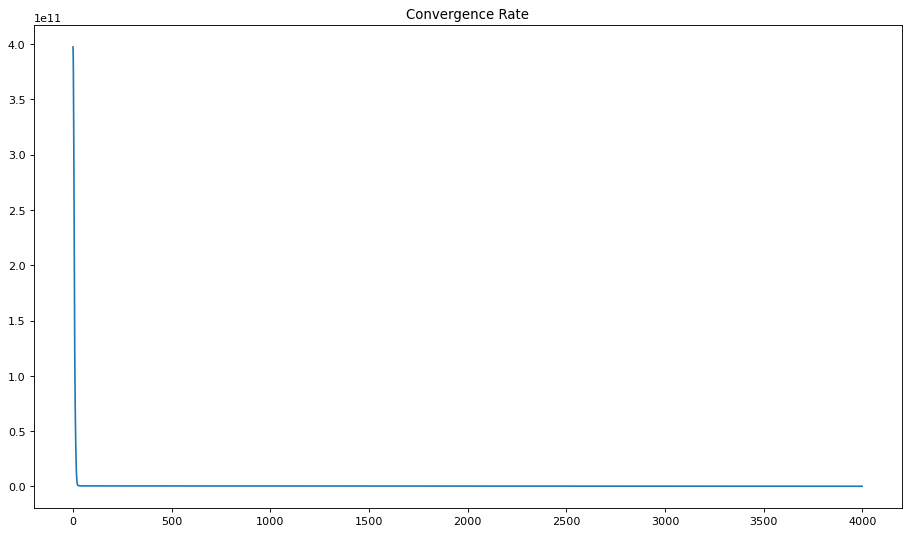

In [49]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
plt.show()

### A Method to Generate Data for Future

In [50]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

#### Evaluating model on training data (whole data this time)

In [51]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

#### Generting Future Data and Predicting Future Cases

In [52]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

#### Evaluating metrics of trained ANN

In [53]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

22/22 [==============================] - 0s 1ms/step - loss: 219981728.0000 - mean_absolute_error: 9217.5547


[219981728.0, 9217.5546875]

#### Dataframe of predicted cases on future data by proposed ANN

In [54]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
10/02/22,1465127.125,30156.474609,1345467.875
11/02/22,1468084.125,30168.603516,1348858.625
12/02/22,1471034.125,30180.060547,1352246.875
13/02/22,1473976.625,30190.873047,1355632.375
14/02/22,1476911.875,30201.021484,1359015.125
15/02/22,1479839.875,30210.507812,1362395.375
16/02/22,1482760.250,30219.308594,1365772.375
17/02/22,1485673.375,30227.449219,1369147.375


### Plotting Graphs

In [55]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates, 
#          ann_future_model_prediction_on_training[:,0], '*b', 
#          ann_future_model_prediction_on_training[:,1], '*r', 
#          ann_future_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], fontsize=16)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

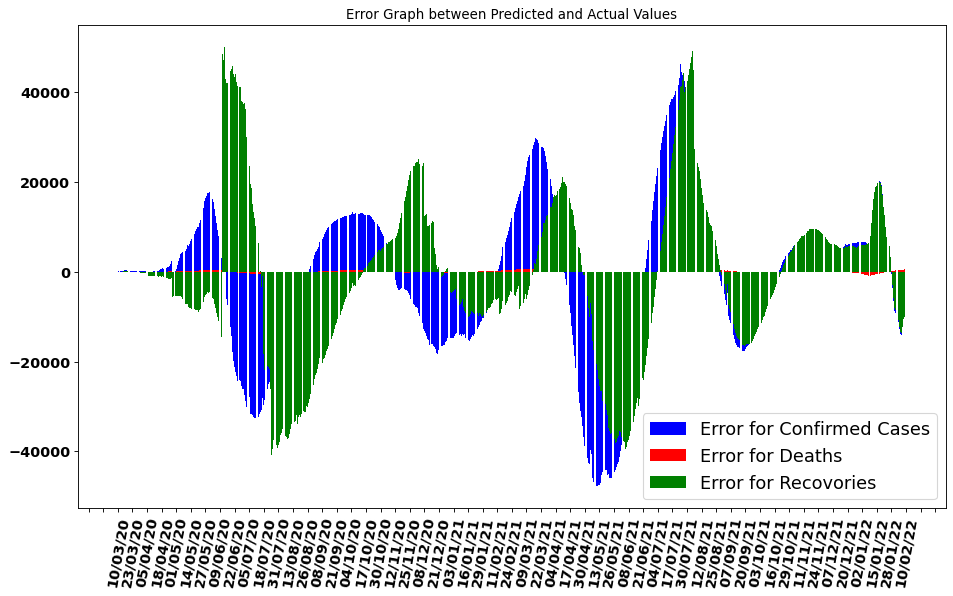

In [56]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

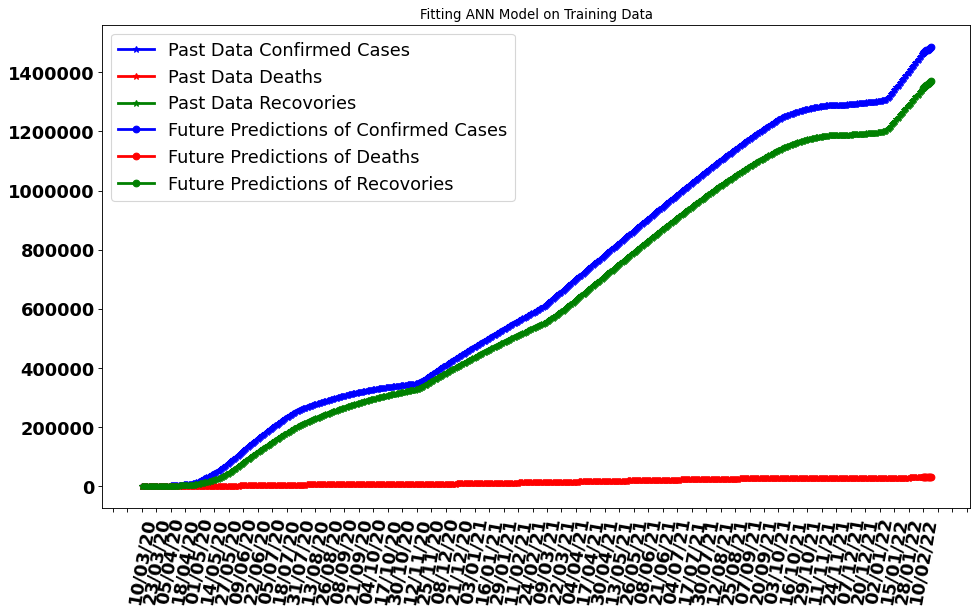

In [57]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()